In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

### Cat Nat and Urbanization

In [21]:
data = pd.read_csv('../../data/data(4).csv', sep=';') #de 2009 à 2023 https://www.observatoire-des-territoires.gouv.fr/part-denaf-consommes-entre-le-1er-janvier-2009-et-le-1er-janvier-2023
data.columns = data.iloc[1]
data = data.drop([0, 1])

In [22]:
data.columns = ['Code', 'Libellé', 'Cat', 'Evolution_SAU', 'Urbain', 'Zone humide', 'Forets', 'Agri', 'Superficie', 'Conso_ENAF', 'Population']

In [35]:
df_catnat = pd.read_csv('../../data/gaspar/catnat_gaspar.csv', sep=';')

df_catnat['dat_deb'] = pd.to_datetime(df_catnat['dat_deb'], format='%Y-%m-%d')
df_catnat['dat_pub_jo'] = pd.to_datetime(df_catnat['dat_pub_jo'], format='%Y-%m-%d')
df_catnat['duree'] = (df_catnat['dat_pub_jo'] - df_catnat['dat_deb']).dt.days


df_catnat = df_catnat[df_catnat['lib_risque_jo'] == 'Sécheresse']
df_catnat = df_catnat[df_catnat['dat_fin']<'2005-01-01']
print(df_catnat['dat_deb'].dt.year.value_counts())
df_catnat = df_catnat[['cod_commune','lib_risque_jo']].groupby('cod_commune').count()
df_catnat

dat_deb
2003    4473
1989    3977
1991    1397
1992    1276
1993     964
2002     877
1998     852
1996     707
1990     621
1995     402
1997     381
2004     287
1994     137
1999     127
2000     118
2001      24
1988      11
Name: count, dtype: int64


lib_risque_jo
cod_commune               
01004                    1
01007                    1
01024                    1
01025                    1
01029                    1
...                    ...
95598                    2
95607                    2
95637                   10
95678                    2
95680                    1

[7328 rows x 1 columns]

In [24]:
data = data.merge(df_catnat, left_on='Code', right_on='cod_commune', how='left')

count    34935.000000
mean         7.386632
std          5.442704
min          0.000000
25%          4.000000
50%          6.000000
75%          9.000000
max        135.000000
Name: Cat, dtype: float64


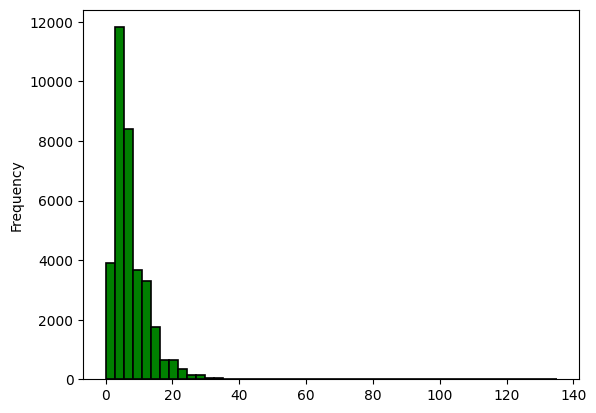

In [25]:
data.iloc[:,2].astype(float).plot(kind='hist', bins=50, color='green', edgecolor='black', linewidth=1.2)
print(data.iloc[:,2].astype(float).describe())

In [26]:
data = data[data.Evolution_SAU != 'N/A - résultat non disponible']
data = data[data.Evolution_SAU != 'N/A - division par 0']

data = data[data.Conso_ENAF != 'N/A - division par 0']
data = data[data.Conso_ENAF != 'N/A - résultat non disponible']
data = data[data.Urbain != 'N/A - division par 0']
data = data[data.Urbain != 'N/A - résultat non disponible']
data = data[data.Superficie != 'N/A - division par 0']
data = data[data.Superficie != 'N/A - résultat non disponible']
data = data[data.Population != 'N/A - division par 0']
data = data[data.Population != 'N/A - résultat non disponible']

#plot the mean of the columns 3 for each decile of the column 2
data.Cat = data.Cat.astype(float)
data.Evolution_SAU = data.Evolution_SAU.astype(float)
data.Urbain = data.Urbain.astype(float)
data['Zone humide'] = data['Zone humide'].astype(float)
data.Forets = data.Forets.astype(float)
data.Agri = data.Agri.astype(float)
data.Superficie = data.Superficie.astype(float)
data.Conso_ENAF = data.Conso_ENAF.astype(float)
data.Population = data.Population.astype(float)
data['Conso_ENAF_sup'] = data['Conso_ENAF']/data['Superficie']
data['densite'] = data['Population']/data['Superficie']
data['Cat_sup'] = data['lib_risque_jo']/data['Superficie']
data['Cat_pop'] = data['lib_risque_jo']/data['Population']
deciles = pd.qcut(data.loc[:,'Cat_sup'], 10, labels=False)
data['decile'] = deciles

In [27]:
#group by decile and calculate the mean of column 3
data_plot = data[['decile', 'Superficie', 'Population', 'Conso_ENAF', 'Cat', 'Cat_sup', 'Cat_pop', 'Conso_ENAF_sup', 'densite']]

data_plot = data_plot.groupby('decile').mean()

Text(0.5, 0, 'Decile of Natural Hazard Declared/km2')

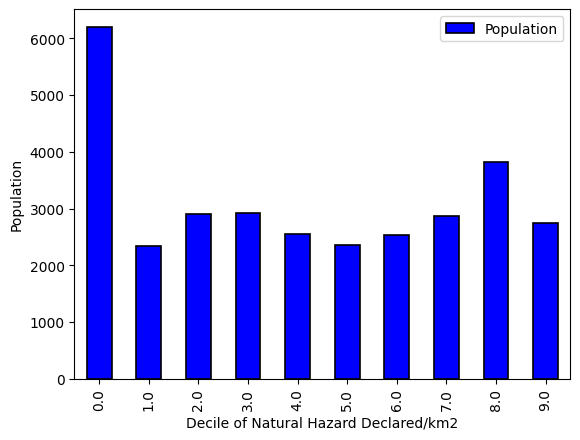

In [28]:
data_plot.plot(y='Population', kind='bar', color='blue', edgecolor='black', linewidth=1.2)
plt.ylabel('Population')
plt.xlabel('Decile of Natural Hazard Declared/km2')

Text(0.5, 0, 'decile nb CATNAT-RGA/km2 before 2005')

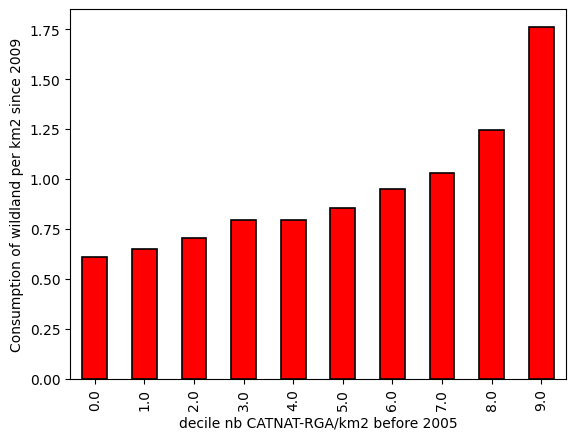

In [33]:
#same for column 3
data_plot.plot(y='Conso_ENAF_sup', kind='bar', color='red', edgecolor='black', linewidth=1.2, legend=False)
plt.ylabel('Consumption of wildland per km2 since 2009')
plt.xlabel('decile nb CATNAT-RGA/km2 before 2005')


In [7]:
df_conso = pd.read_csv('data/conso2009-2023-resultats-com.csv', sep=';')

C:\Users\colin\AppData\Local\Temp\ipykernel_22796\2438125833.py:1: DtypeWarning: Columns (0,4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_conso = pd.read_csv('data/conso2009-2023-resultats-com.csv', sep=';')


In [8]:
cols = ['artcom0923','art09hab23', 'idcom']

#merge data on Code and idcom
data['Code'] = data['Code'].astype(str)
df_conso['artcom0923'] = df_conso['artcom0923'].astype(str)
df_conso = df_conso[cols]

In [9]:
#the number with only 4 digits need to be completed with 0 at the beginning
df_conso['idcom'] = df_conso['idcom'].apply(lambda x: '0'+str(x) if len(str(x)) == 4 else str(x) )


In [10]:
df = data.merge(df_conso, left_on='Code', right_on='idcom')

In [13]:
#check the coevolution of Conso_ENAF/Superficie and art09hab23
df['artcom0923'] = df['artcom0923'].astype(float)
df['art09hab23'] = df['art09hab23'].astype(float)
df['art09hab23'] = df['art09hab23']/df['Superficie']/1e4

Text(0, 0.5, 'Population growth rate')

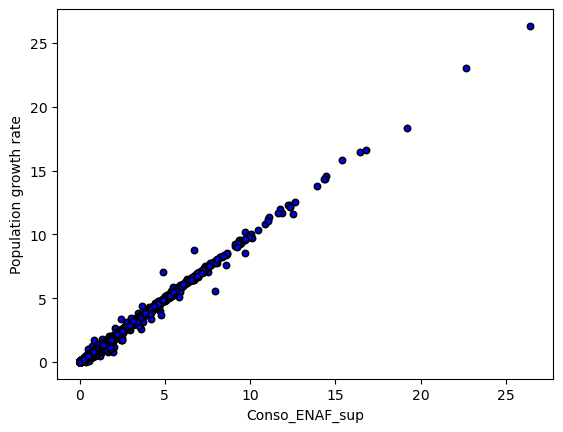

In [14]:
df.plot(x='Conso_ENAF_sup', y='artcom0923', kind='scatter', color='blue', edgecolor='black', linewidth=1.2)
plt.ylabel('Population growth rate')

Text(0.5, 1.0, 'The slope of the regression is 0.3')

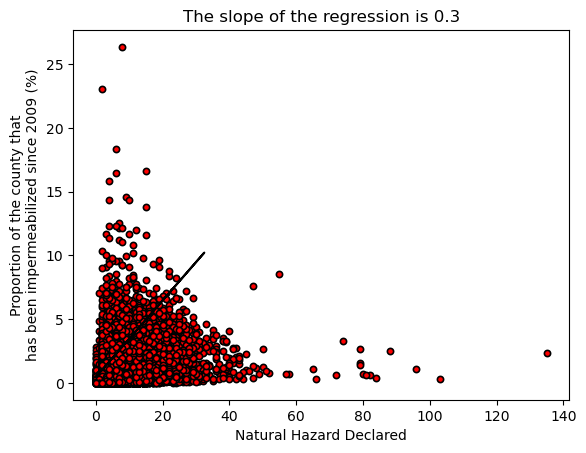

In [37]:
df.plot(x='Cat', y='artcom0923', kind='scatter', color='red', edgecolor='black', linewidth=1.2)
#add the linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(df[['Cat_sup']], df['artcom0923'])
a = model.coef_
b = model.intercept_
plt.plot(df['Cat_sup'], a*df['Cat_sup']+b, color='black')
plt.ylabel('Proportion of the county that\nhas been impermeabilized since 2009 (%)')
plt.xlabel('Natural Hazard Declared')
#print in the title the slope
plt.title('The slope of the regression is '+str(round(a[0], 3)))



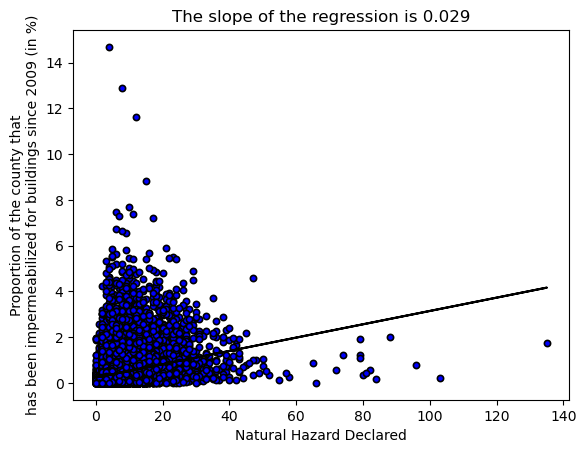

In [38]:
df.plot(x='Cat', y='art09hab23', kind='scatter', color='blue', edgecolor='black', linewidth=1.2)
#add the linear regression
model = LinearRegression()
model.fit(df[['Cat']], df['art09hab23'])
a = model.coef_
b = model.intercept_
plt.plot(df['Cat'], a*df['Cat']+b, color='black')
plt.ylabel('Proportion of the county that\nhas been impermeabilized for buildings since 2009 (in %)')
plt.xlabel('Natural Hazard Declared')

#print in the title the slope
plt.title('The slope of the regression is '+str(round(a[0], 3)))
plt.show()


### Climate Risks

In [15]:
shp = gpd.read_file('C:/Users/colin/Downloads/communes-20220101-shp/communes-20220101.shp')
data_new = pd.read_csv('data/indicesQ50_25021114242922763.txt', sep=';', comment='#', header=None)
data_new.columns = ['index', 'lat', 'lon', 'scenario', 'tasmax', 'day30', 'pr_cum', 'wf_risk', 'droughts_day', 'nan']
data_new = data_new.drop('nan', axis=1)

In [40]:
shp = shp[shp.insee.isin(df['Code'])]
#map the data_new to each county in the shapefile based on the closest lat lon
from scipy.spatial import distance
def closest_node(node, nodes):
    closest_index = distance.cdist([node], nodes).argmin()
    return closest_index

shp_bis = shp.copy()
shp_bis['lat'] = shp_bis.geometry.centroid.y
shp_bis['lon'] = shp_bis.geometry.centroid.x
shp_bis['index'] = shp_bis.apply(lambda x: closest_node([x['lat'], x['lon']], data_new[['lat', 'lon']].values), axis=1)



C:\Users\colin\AppData\Local\Temp\ipykernel_47692\4556759.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_bis['lat'] = shp_bis.geometry.centroid.y
C:\Users\colin\AppData\Local\Temp\ipykernel_47692\4556759.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_bis['lon'] = shp_bis.geometry.centroid.x


In [41]:
shp_bis['pr_cum'] = shp_bis['index'].apply(lambda x: data_new.loc[x, 'pr_cum'])
shp_bis['tasmax'] = shp_bis['index'].apply(lambda x: data_new.loc[x, 'tasmax'])
shp_bis['wf_risk'] = shp_bis['index'].apply(lambda x: data_new.loc[x, 'wf_risk'])
shp_bis['droughts_day'] = shp_bis['index'].apply(lambda x: data_new.loc[x, 'droughts_day'])
shp_bis['day30'] = shp_bis['index'].apply(lambda x: data_new.loc[x, 'day30'])

In [42]:
df = df.merge(shp_bis[['insee', 'pr_cum', 'tasmax', 'wf_risk', 'droughts_day', 'day30']], left_on='Code', right_on='insee')

Text(0.5, 1.0, 'Temperature max')

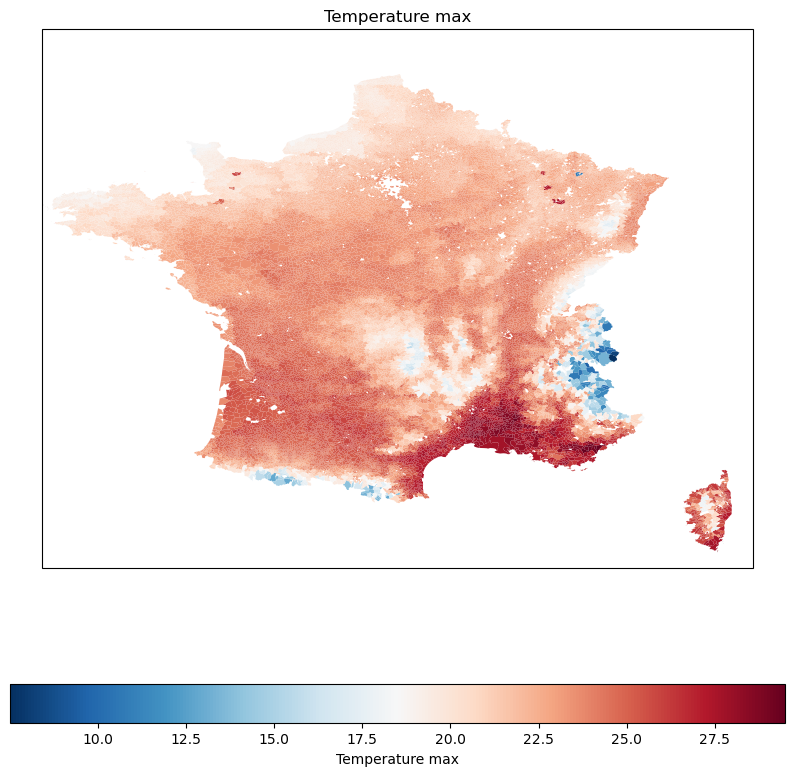

In [43]:
#plot the quantiles of tasmax
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig,ax = plt.subplots(1,1, figsize=(10,10), subplot_kw={'projection': ccrs.PlateCarree()})
shp_bis.plot(column='tasmax', legend=True, cmap='RdBu_r', ax=ax, linewidth=1.2, transform=ccrs.PlateCarree(), legend_kwds={'orientation': 'horizontal', 'label': 'Temperature max'})
ax.set_extent([-5, 10, 41, 52], crs=ccrs.PlateCarree())
ax.set_title('Temperature max')


Text(0.5, 1.0, 'Days above 30°C')

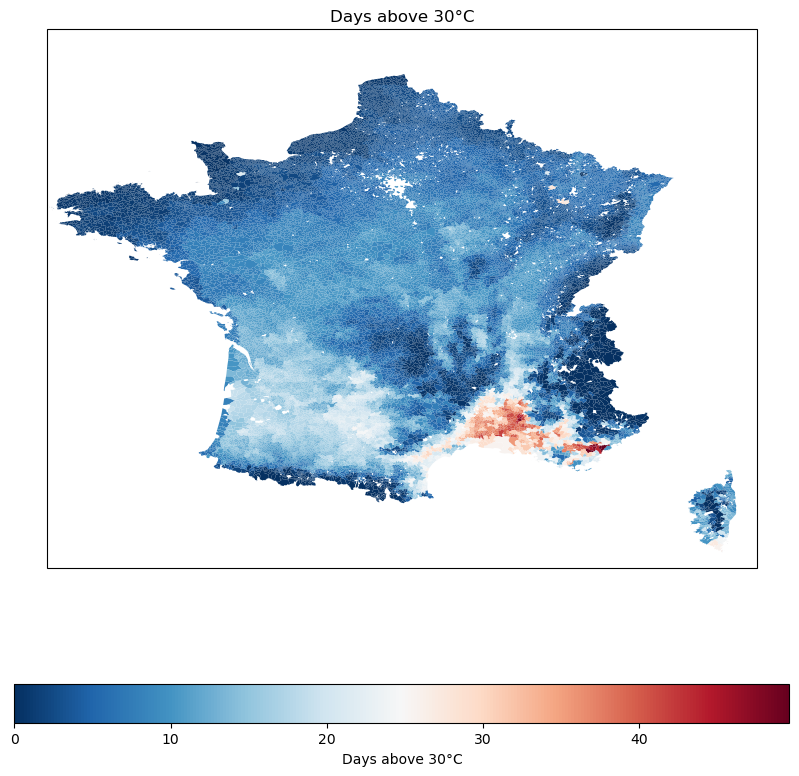

In [44]:
#plot the quantiles of tasmax
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig,ax = plt.subplots(1,1, figsize=(10,10), subplot_kw={'projection': ccrs.PlateCarree()})
shp_bis.plot(column='day30', legend=True, cmap='RdBu_r', ax=ax, linewidth=1.2, transform=ccrs.PlateCarree(), legend_kwds={'orientation': 'horizontal', 'label': 'Days above 30°C'})
ax.set_extent([-5, 10, 41, 52], crs=ccrs.PlateCarree())
ax.set_title('Days above 30°C')

Text(0.5, 1.0, 'Extreme Precipitation')

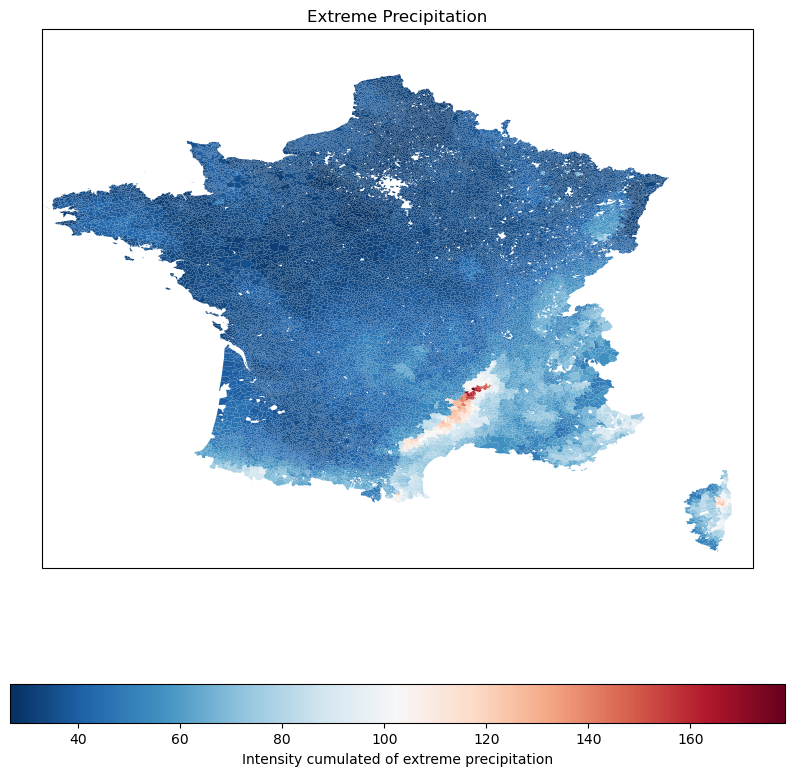

In [45]:
#plot the quantiles of tasmax
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig,ax = plt.subplots(1,1, figsize=(10,10), subplot_kw={'projection': ccrs.PlateCarree()})
shp_bis.plot(column='pr_cum', legend=True, cmap='RdBu_r', ax=ax, linewidth=1.2, transform=ccrs.PlateCarree(), legend_kwds={'orientation': 'horizontal', 'label': 'Intensity cumulated of extreme precipitation'})
ax.set_extent([-5, 10, 41, 52], crs=ccrs.PlateCarree())
ax.set_title('Extreme Precipitation')

Text(0.5, 1.0, 'Droughts Day Annual Frequency')

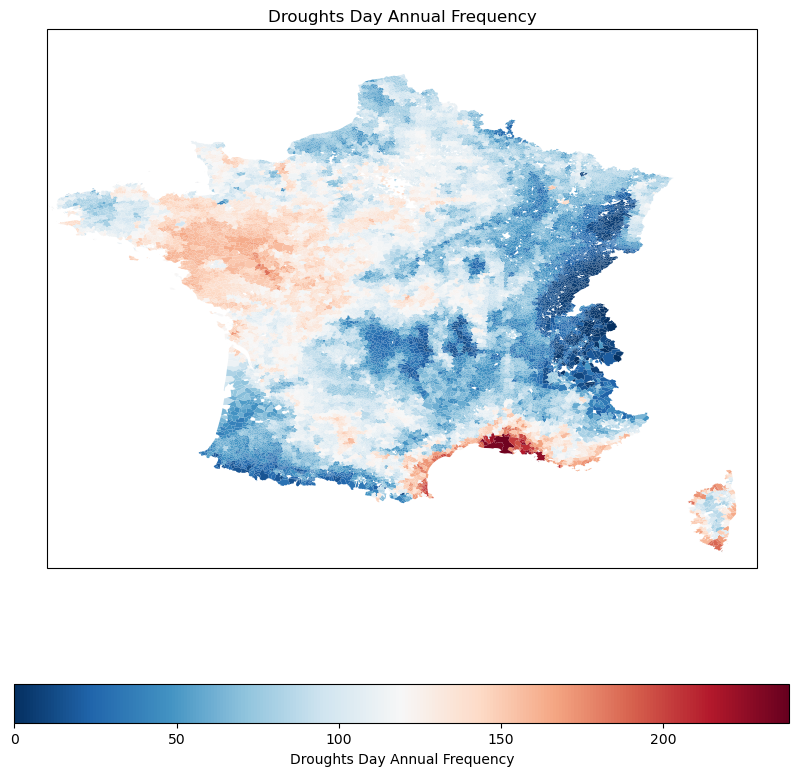

In [46]:
#plot the quantiles of tasmax
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig,ax = plt.subplots(1,1, figsize=(10,10), subplot_kw={'projection': ccrs.PlateCarree()})
shp_bis.plot(column='droughts_day', legend=True, cmap='RdBu_r', ax=ax, linewidth=1.2, transform=ccrs.PlateCarree(), legend_kwds={'orientation': 'horizontal', 'label': 'Droughts Day Annual Frequency'})
ax.set_extent([-5, 10, 41, 52], crs=ccrs.PlateCarree())
ax.set_title('Droughts Day Annual Frequency')

Text(0.5, 1.0, 'Wildfire Risk')

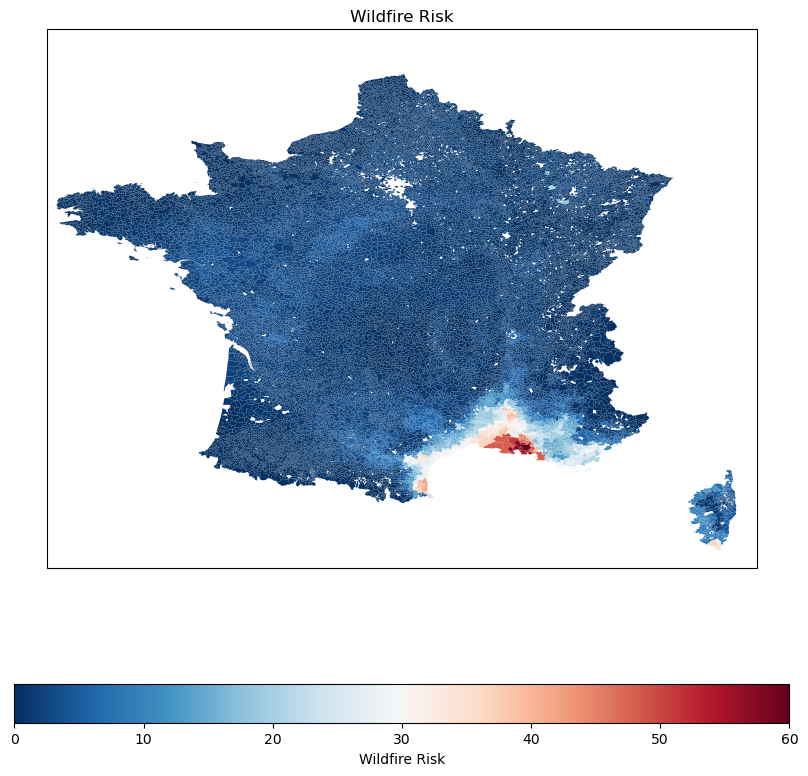

In [47]:
#plot the quantiles of tasmax
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig,ax = plt.subplots(1,1, figsize=(10,10), subplot_kw={'projection': ccrs.PlateCarree()})
shp_bis.plot(column='wf_risk', legend=True, cmap='RdBu_r', ax=ax, linewidth=1.2, transform=ccrs.PlateCarree(), legend_kwds={'orientation': 'horizontal', 'label': 'Wildfire Risk'})
ax.set_extent([-5, 10, 41, 52], crs=ccrs.PlateCarree())
ax.set_title('Wildfire Risk')

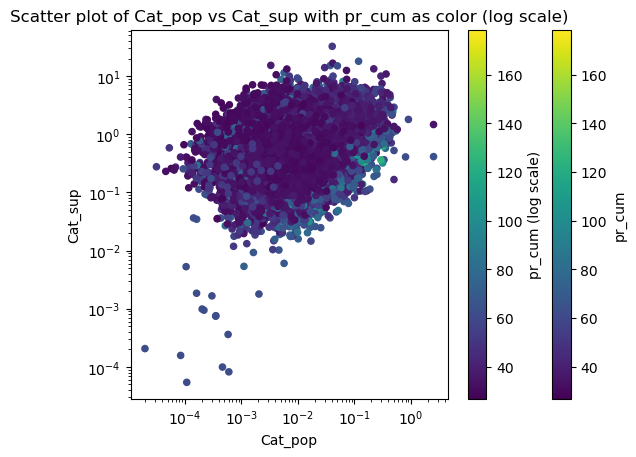

In [48]:
scatter = df.plot.scatter(x='Cat_pop', y='Cat_sup', c='pr_cum', colormap='viridis', logy=True, logx=True)
plt.colorbar(scatter.collections[0], label='pr_cum (log scale)')
plt.xlabel('Cat_pop')
plt.ylabel('Cat_sup')
plt.title('Scatter plot of Cat_pop vs Cat_sup with pr_cum as color (log scale)')
plt.show()

c:\Users\colin\anaconda3\envs\xarray_env\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1345: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0, 0.5, 'pr_cum')

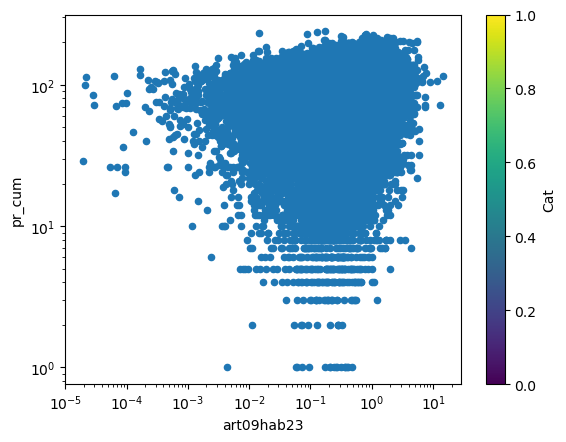

In [49]:
scatter = df.plot.scatter(x='art09hab23', y='droughts_day', colormap='viridis', logy=True, logx=True)
plt.colorbar(scatter.collections[0], label='Cat')
plt.xlabel('art09hab23')
plt.ylabel('pr_cum')


Text(0.5, 0, 'Decile of tasmax')

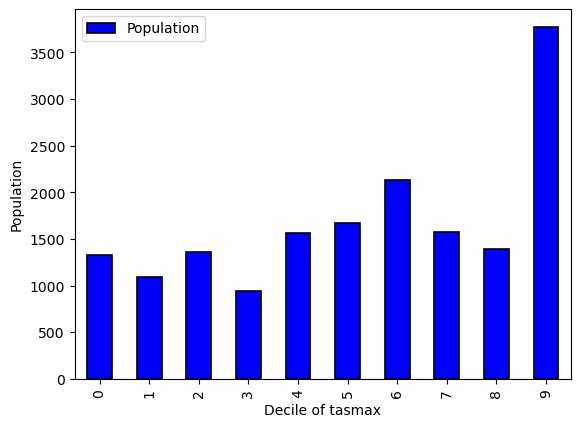

In [50]:
df['decile_tasmax'] = pd.qcut(df['tasmax'], 10, labels=False)

df_plot = df[['decile_tasmax', 'Conso_ENAF', 'Population', 'Superficie', 'Cat', 'Cat_sup', 'Cat_pop', 'Conso_ENAF_sup', 'densite']]
df_plot = df_plot.groupby('decile_tasmax').mean()

df_plot.plot(y='Population', kind='bar', color='blue', edgecolor='black', linewidth=1.2)
plt.ylabel('Population')
plt.xlabel('Decile of tasmax')

Text(0.5, 0, 'Decile of Max Temperature in Summer')

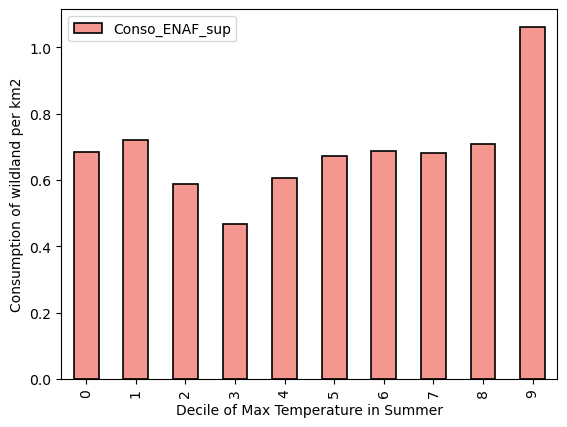

In [51]:
df_plot.plot(y='Conso_ENAF_sup', kind='bar', color='#f4978e', edgecolor='black', linewidth=1.2)
plt.ylabel('Consumption of wildland per km2')
plt.xlabel('Decile of Max Temperature in Summer')

C:\Users\colin\AppData\Local\Temp\ipykernel_47692\1308895474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['decile_day30'] = pd.qcut(df_plot['day30'], 10, labels=False)


Text(0.5, 0, 'Days above 30°C')

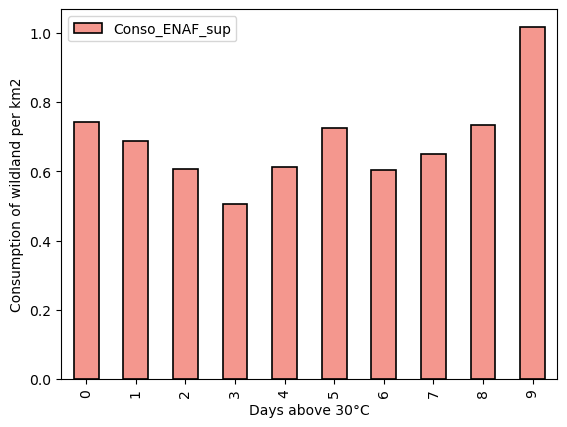

In [52]:
df_plot = df[['day30', 'Conso_ENAF', 'Population', 'Superficie', 'Cat', 'Cat_sup', 'Cat_pop', 'Conso_ENAF_sup', 'densite','art09hab23']]
df_plot['decile_day30'] = pd.qcut(df_plot['day30'], 10, labels=False)
df_plot = df_plot.groupby('decile_day30').mean()


df_plot.plot(y='Conso_ENAF_sup', kind='bar', color='#f4978e', edgecolor='black', linewidth=1.2)
plt.ylabel('Consumption of wildland per km2')
plt.xlabel('Days above 30°C')


C:\Users\colin\AppData\Local\Temp\ipykernel_47692\2954949840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['decile_pr_cum'] = pd.qcut(df_plot['pr_cum'], 10, labels=False)


Text(0.5, 0, 'Decile of pr_cum')

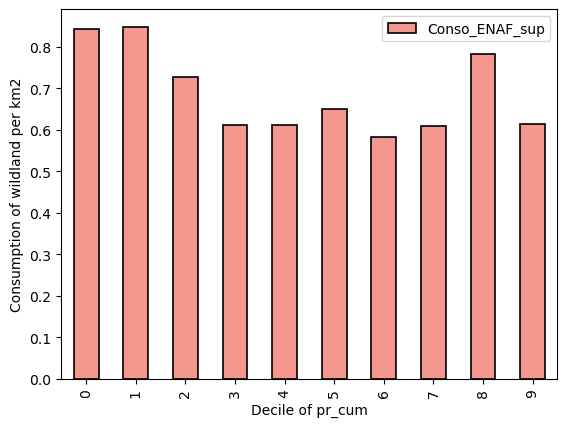

In [53]:
df_plot = df[['pr_cum', 'Conso_ENAF', 'Population', 'Superficie', 'Cat', 'Cat_sup', 'Cat_pop', 'Conso_ENAF_sup', 'densite']]
df_plot['decile_pr_cum'] = pd.qcut(df_plot['pr_cum'], 10, labels=False)
df_plot = df_plot.groupby('decile_pr_cum').mean()

df_plot.plot(y='Conso_ENAF_sup', kind='bar', color='#f4978e', edgecolor='black', linewidth=1.2)
plt.ylabel('Consumption of wildland per km2')
plt.xlabel('Decile of pr_cum')


C:\Users\colin\AppData\Local\Temp\ipykernel_47692\4272091076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['decile_pr_cum'] = pd.qcut(df_plot['pr_cum'], 10, labels=False)


Text(0.5, 0, 'Decile of pr_cum')

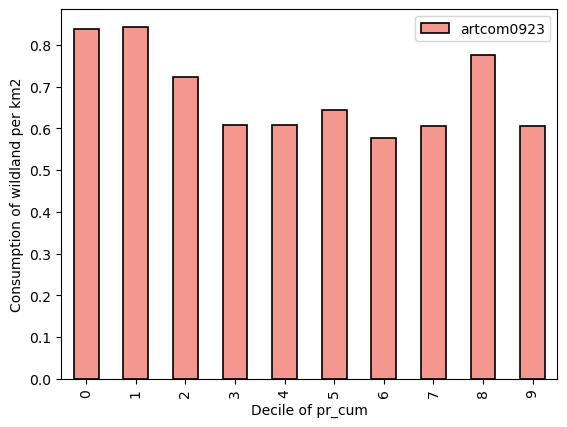

In [54]:
df_plot = df[['pr_cum', 'Conso_ENAF', 'Population', 'Superficie', 'Cat', 'Cat_sup', 'Cat_pop', 'Conso_ENAF_sup', 'densite', 'artcom0923', 'art09hab23']]
df_plot['decile_pr_cum'] = pd.qcut(df_plot['pr_cum'], 10, labels=False)
df_plot = df_plot.groupby('decile_pr_cum').mean()

df_plot.plot(y='artcom0923', kind='bar', color='#f4978e', edgecolor='black', linewidth=1.2)
plt.ylabel('Consumption of wildland per km2')
plt.xlabel('Decile of pr_cum')


In [55]:
df.columns

Index(['Code', 'Libellé', 'Cat', 'Evolution_SAU', 'Urbain', 'Zone humide',
       'Forets', 'Agri', 'Superficie', 'Conso_ENAF', 'Population',
       'Conso_ENAF_sup', 'densite', 'Cat_sup', 'Cat_pop', 'decile',
       'artcom0923', 'art09hab23', 'idcom', 'insee', 'pr_cum', 'tasmax',
       'wf_risk', 'droughts_day', 'day30', 'decile_tasmax'],
      dtype='object')

C:\Users\colin\AppData\Local\Temp\ipykernel_47692\2111096437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['decile_droughts'] = pd.qcut(df_plot['droughts_day'], 10, labels=False, duplicates='drop')


Text(0.5, 0, 'Decile of droughts frequency')

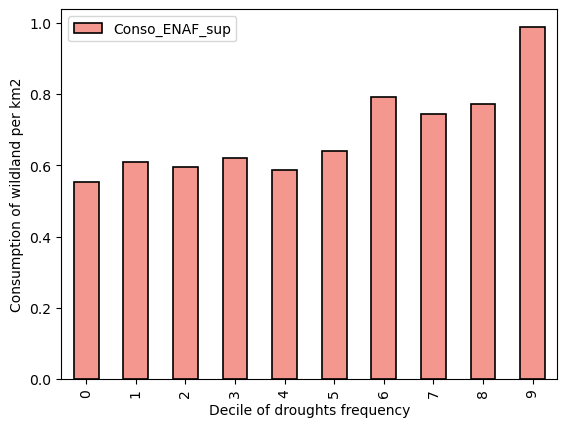

In [56]:
df_plot = df[['droughts_day', 'Population', 'Superficie', 'Cat', 'Cat_sup', 'Cat_pop', 'Conso_ENAF_sup', 'densite']]
df_plot['decile_droughts'] = pd.qcut(df_plot['droughts_day'], 10, labels=False, duplicates='drop')
df_plot = df_plot.groupby('decile_droughts').mean()

df_plot.plot(y='Conso_ENAF_sup', kind='bar', color='#f4978e', edgecolor='black', linewidth=1.2)
plt.ylabel('Consumption of wildland per km2')
plt.xlabel('Decile of droughts frequency')

<Axes: ylabel='Frequency'>

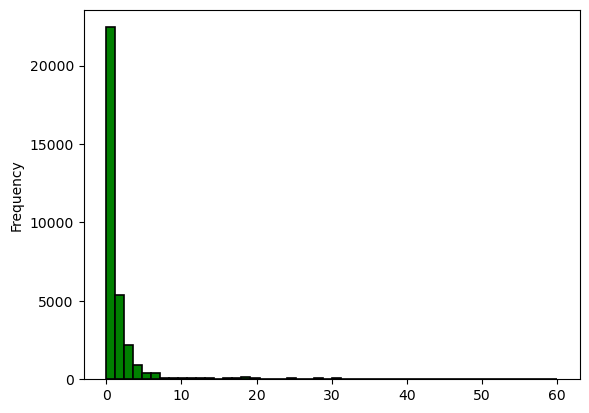

In [57]:
df.wf_risk.plot.hist(bins=50, color='green', edgecolor='black', linewidth=1.2)

In [58]:
df_plot

droughts_day   Population  Superficie       Cat   Cat_sup  \
decile_droughts                                                              
0                   21.854380  1142.313507   41.181863  5.702315  0.682621   
1                   47.941283  1421.657082   15.879540  6.869855  0.782779   
2                   62.967780  1088.751492   14.521569  6.722554  0.817142   
3                   74.967033  1290.820818   14.085592  7.018315  0.813442   
4                   85.828974  1280.581546   14.203761  6.734352  0.754544   
5                   96.663766  1706.215549   14.449677  6.879035  0.721286   
6                  106.101213  1443.205682   14.214176  7.813258  0.859847   
7                  114.790736  1521.834055   15.496301  7.775741  0.760823   
8                  125.497629  1994.981624   17.530083  8.567872  0.752788   
9                  148.115468  3988.169188   24.455171  9.791911  0.682384   

                  Cat_pop  Conso_ENAF_sup     densite  
decile_droughts                                        
0                0.023434        0.552001   86.341940  
1                0.029203        0.608815  101.057606  
2                0.027592        0.594098   86.037883  
3                0.025119        0.619597  114.340819  
4                0.021732        0.585549  107.765678  
5                0.021871        0.641218  126.267525  
6                0.022173        0.790664  120.758190  
7                0.020534        0.745247  116.817669  
8                0.019281        0.771332  133.848530  
9                0.013172        0.989139  154.069842

C:\Users\colin\AppData\Local\Temp\ipykernel_47692\3421599317.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['decile_wf'] = pd.qcut(df_plot['wf_risk'], 10, labels=False, duplicates='drop')


Text(0.5, 0, 'Wildfire Risk')

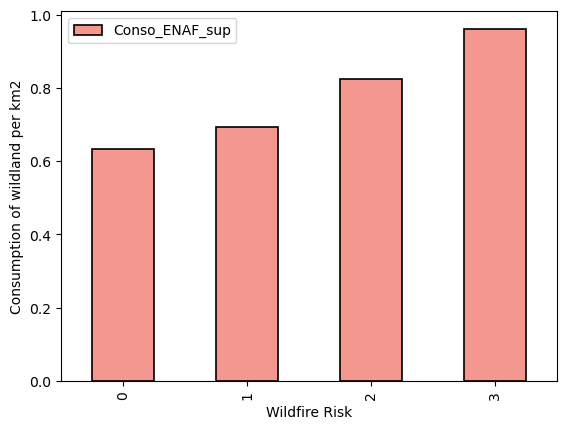

In [59]:
df_plot = df[['wf_risk', 'Population', 'Superficie', 'Cat', 'Cat_sup', 'Cat_pop', 'Conso_ENAF_sup', 'densite']]
df_plot['decile_wf'] = pd.qcut(df_plot['wf_risk'], 10, labels=False, duplicates='drop')
df_plot = df_plot.groupby('decile_wf').mean()

df_plot.plot(y='Conso_ENAF_sup', kind='bar', color='#f4978e', edgecolor='black', linewidth=1.2)
plt.ylabel('Consumption of wildland per km2')
plt.xlabel('Wildfire Risk')

### Cat Nat and Climate Risks

In [11]:
catnat_gaspar = pd.read_csv('data/catnat_gaspar.csv', sep=';')

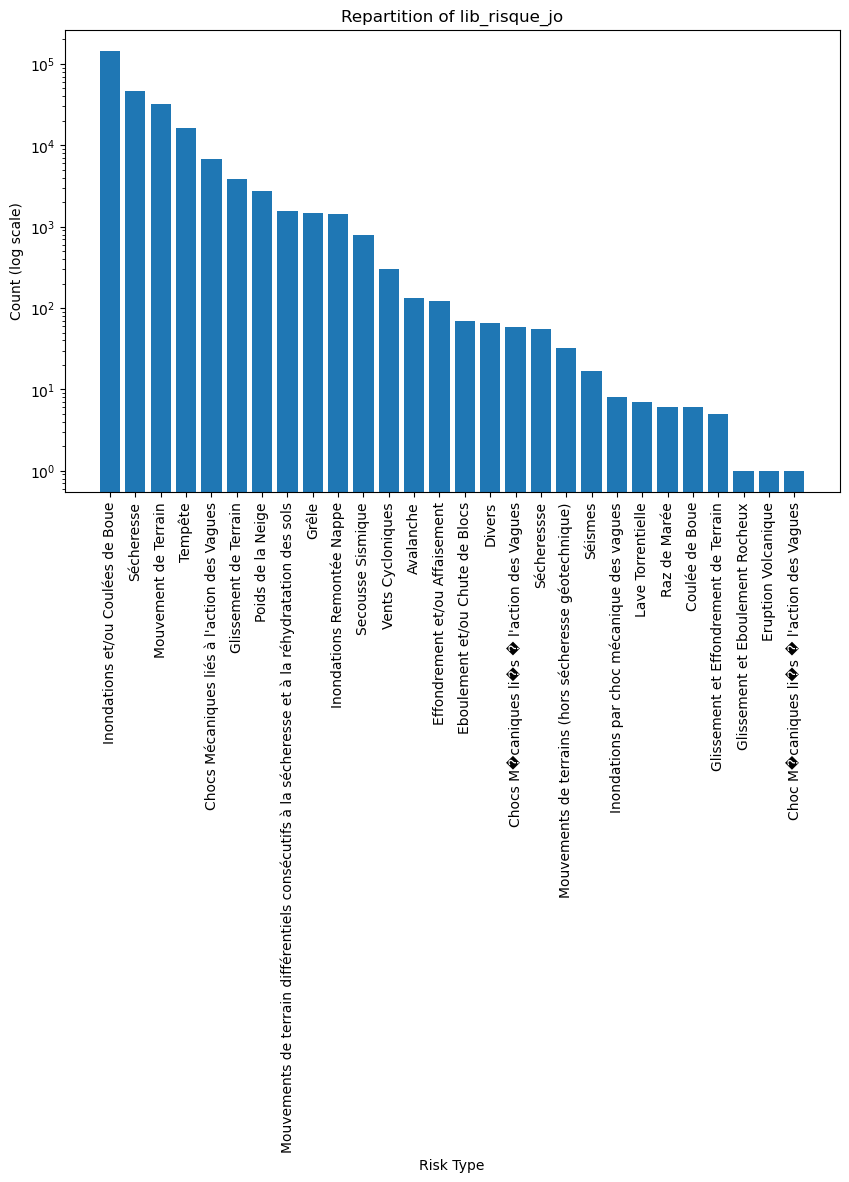

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(catnat_gaspar.lib_risque_jo.value_counts().index, catnat_gaspar.lib_risque_jo.value_counts())
plt.yscale('log')
plt.xticks(rotation=90)
plt.ylabel('Count (log scale)')
plt.xlabel('Risk Type')
plt.title('Repartition of lib_risque_jo')
plt.show()

<Axes: xlabel='year'>

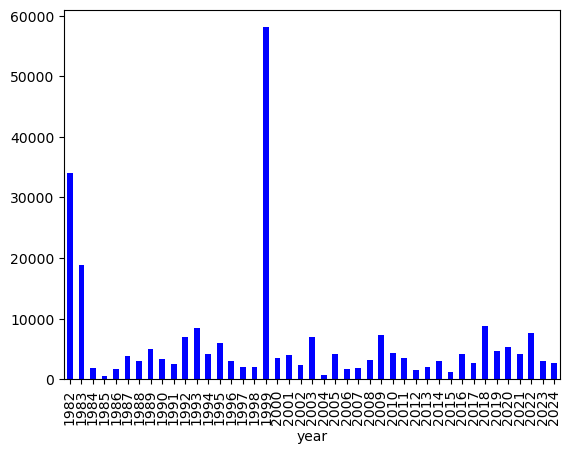

In [13]:
#show evolution of the declaration of natural hazard

catnat_gaspar['dat_deb'] = pd.to_datetime(catnat_gaspar['dat_deb'])

catnat_gaspar['year'] = catnat_gaspar['dat_deb'].dt.year

#line plot
catnat_gaspar['year'].value_counts().sort_index().plot(kind='bar', color='blue', linewidth=1.2)

In [16]:
#now merge the shapefile with the number of natural hazard declared


gaspar_agg = catnat_gaspar.groupby('cod_commune').count().reset_index()
gaspar_agg = gaspar_agg[['cod_commune', 'lib_risque_jo']]
gaspar_agg.sort_values(by='lib_risque_jo', ascending=False, inplace=True)
gaspar_agg

cod_commune  lib_risque_jo
1849        06088            138
17394       49261            103
4237        13055             96
1788        06027             89
17336       49125             84
...           ...            ...
6549        21097              1
6562        21113              1
33804       89288              1
6565        21118              1
34699       97617              1

[34700 rows x 2 columns]

In [17]:
gaspar_agg[gaspar_agg.cod_commune == '91345']

cod_commune  lib_risque_jo
34172       91345             23

In [18]:
shp_bis = gpd.read_file('C:/Users/colin/Downloads/georef-france-commune/georef-france-commune-millesime.shp')


In [19]:
shp_bis['bv2022_code'] = shp_bis['bv2022_code'].apply(lambda x: x[2:-2] if x is not None else None)

In [20]:
# shp_bis['insee'] = shp_bis['insee'].astype(str)
gaspar_agg['cod_commune'] = gaspar_agg['cod_commune'].astype(str)
shp_bis = shp_bis.merge(gaspar_agg, left_on='bv2022_code', right_on='cod_commune', how='left')
# shp_bis['lib_risque_jo'] = shp_bis['lib_risque_jo'].fillna(0)

In [131]:
shp_bis.shape, shp.shape

((33304, 7), (33304, 5))

C:\Users\colin\AppData\Local\Temp\ipykernel_47692\2475855861.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  lat,lon = shp[shp.insee == '18033'].geometry.centroid.y, shp[shp.insee == '18033'].geometry.centroid.x
C:\Users\colin\AppData\Local\Temp\ipykernel_47692\2475855861.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  lat,lon = shp[shp.insee == '18033'].geometry.centroid.y, shp[shp.insee == '18033'].geometry.centroid.x


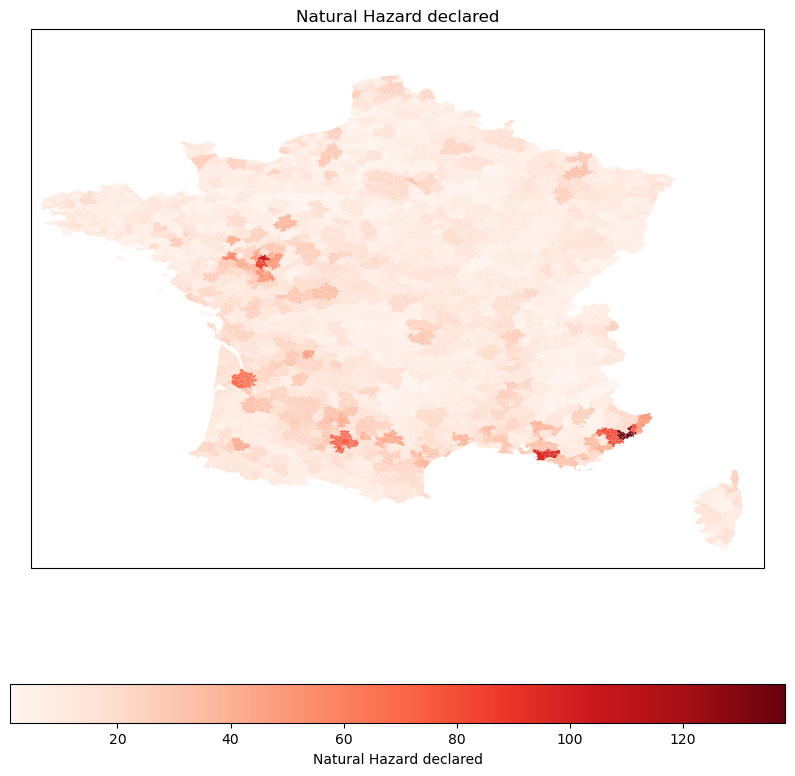

In [ ]:
fig,ax = plt.subplots(1,1, figsize=(10,10), subplot_kw={'projection': ccrs.PlateCarree()})
shp_bis.plot(column='lib_risque_jo', legend=True, cmap='Reds', ax=ax, linewidth=1.2, transform=ccrs.PlateCarree(), legend_kwds={'orientation': 'horizontal', 'label': 'Natural Hazard declared'})
ax.set_extent([-5, 10, 41, 52], crs=ccrs.PlateCarree())
ax.set_title('Natural Hazard declared')

# lat,lon = shp[shp.insee == '18033'].geometry.centroid.y, shp[shp.insee == '18033'].geometry.centroid.x
#make a cross on the county 18033
# plt.scatter(lon, lat, marker='x', color='red')

In [39]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

def run_regression(df):
    """
    Run an OLS regression to estimate the influence of urbanization on the number
    of catnat per km2 while controlling for density, longitude, latitude, population,
    and median income.
    
    You can add further controls if available in your dataset.
    """
    # Define the regression formula.
    # Note: Change the variable names if your dataset uses different names.
    # formula = ("catnat_km2 ~ urbanization + density + longitude + latitude "
    #            "+ population + median_income")
    formula = ("catnat_km2 ~ urbanization + density + longitude + latitude ")
    # Fit the OLS model.
    model = smf.ols(formula=formula, data=df).fit(cov_type='HC3')  # robust standard errors
    return model

def plot_results(df, model):
    """
    Optional: Create a scatter plot of the relationship between urbanization and 
    catnat_km2. This is just one visualization; further diagnostic plots can be added.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(df['urbanization'], df['catnat_km2'], alpha=0.5, label='Data')
    
    # To visualize the fitted relationship, we compute predicted values by varying urbanization.
    urban_range = pd.DataFrame({'urbanization': sorted(df['urbanization'].unique())})
    
    # Use average values for the other controls.
    avg_values = {
        'density': df['density'].mean(),
        'longitude': df['longitude'].mean(),
        'latitude': df['latitude'].mean(),
        #'population': df['population'].mean(),
        # 'median_income': df['median_income'].mean()
    }
    for var, value in avg_values.items():
        urban_range[var] = value
    
    urban_range['predicted_catnat'] = model.predict(urban_range)
    
    plt.plot(urban_range['urbanization'], urban_range['predicted_catnat'], color='red', label='Fitted line')
    plt.xlabel('Urbanization')
    plt.ylabel('Catastrophic Events per km² (catnat_km2)')
    plt.title('Influence of Urbanization on Catastrophic Events')
    plt.legend()
    plt.show()



In [21]:
data = pd.read_csv('data/data(4).csv', sep=';')
data.columns = data.iloc[1]

# Drop the first two rows and reset the index.
data = data.drop([0, 1]).reset_index(drop=True)

# Rename the columns for easier access.
data.columns = ['Code', 'Libellé', 'Cat', 'Evolution_SAU', 'Urbain', 'Zone humide', 
                'Forets', 'Agri', 'Superficie', 'Conso_ENAF', 'Population']

data = data[data.Evolution_SAU != 'N/A - résultat non disponible']
data = data[data.Evolution_SAU != 'N/A - division par 0']

data = data[data.Conso_ENAF != 'N/A - division par 0']
data = data[data.Conso_ENAF != 'N/A - résultat non disponible']
data = data[data.Urbain != 'N/A - division par 0']
data = data[data.Urbain != 'N/A - résultat non disponible']
data = data[data.Superficie != 'N/A - division par 0']
data = data[data.Superficie != 'N/A - résultat non disponible']
data = data[data.Population != 'N/A - division par 0']
data = data[data.Population != 'N/A - résultat non disponible']

#plot the mean of the columns 3 for each decile of the column 2
data.Cat = data.Cat.astype(float)
data.Evolution_SAU = data.Evolution_SAU.astype(float)
data.Urbain = data.Urbain.astype(float)
data['Zone humide'] = data['Zone humide'].astype(float)
data.Forets = data.Forets.astype(float)
data.Agri = data.Agri.astype(float)
data.Superficie = data.Superficie.astype(float)
data.Conso_ENAF = data.Conso_ENAF.astype(float)
data.Population = data.Population.astype(float)
data['Conso_ENAF_sup'] = data['Conso_ENAF']/data['Superficie']
data['densite'] = data['Population']/data['Superficie']
data['Cat_sup'] = data['Cat']/data['Superficie']
data['Cat_pop'] = data['Cat']/data['Population']

In [29]:
df = data[['Cat_sup', 'Conso_ENAF_sup', 'Population', 'Superficie', 'Cat', 'densite', 'Urbain', 'Code', 'Libellé']]
df = df[~ df.Code.str.startswith('97')]
df = df[~ df.Code.str.startswith('96')]

shp_bis['lat'] = shp_bis.geometry.centroid.y
shp_bis['lon'] = shp_bis.geometry.centroid.x

df = df.merge(shp_bis[['bv2022_code', 'lat', 'lon']], left_on='Code', right_on='bv2022_code')

C:\Users\colin\AppData\Local\Temp\ipykernel_19736\2542977576.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_bis['lat'] = shp_bis.geometry.centroid.y
C:\Users\colin\AppData\Local\Temp\ipykernel_19736\2542977576.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_bis['lon'] = shp_bis.geometry.centroid.x


In [35]:
df['catnat_km2'] = df['Cat_sup']
df['urbanization'] = df['Conso_ENAF_sup']
df['density'] = df['densite']
df['longitude'] = df['lon']
df['latitude'] = df['lat']
df['population'] = df['Population']

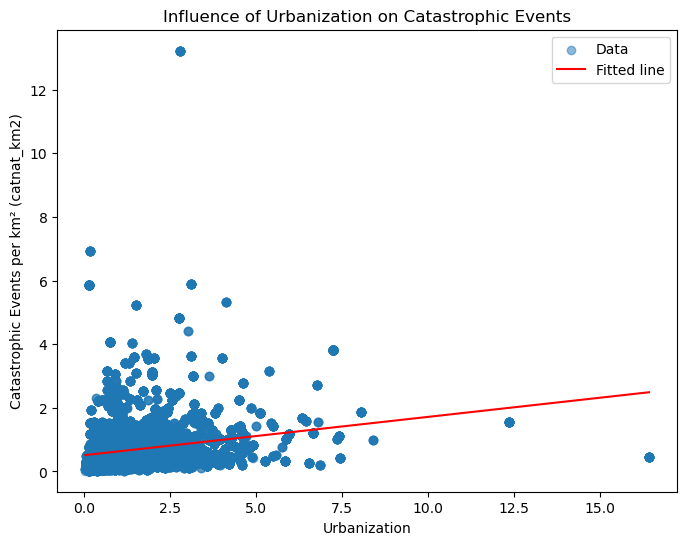

In [40]:
model = run_regression(df)
plot_results(df, model)

In [41]:
#show the coeff and the p-value
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             catnat_km2   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     500.0
Date:                Mon, 17 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:25:31   Log-Likelihood:                -33315.
No. Observations:               33170   AIC:                         6.664e+04
Df Residuals:                   33165   BIC:                         6.668e+04
Df Model:                           4                                         
Covariance Type:                  HC3                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6020      0.087      6.900      0.000       0.431       0.773
urbanization     0.1204      0.005     25.779      0.000       0.111       0.130
density          0.0001   3.63e-06     28.677      0.000    9.69e-05       0.000
longitude       -0.0059      0.001     -4.562      0.000      -0.009      -0.003
latitude        -0.0033      0.002     -1.750      0.080      -0.007       0.000
==============================================================================
Omnibus:                    35172.298   Durbin-Watson:                   0.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4719942.996
Skew:                           5.138   Prob(JB):                         0.00
Kurtosis:                      60.528   Cond. No.                     3.05e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 3.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\colin\AppData\Local\Temp\ipykernel_22796\3272823871.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  juvi_catnat['year'] = juvi_catnat['dat_deb'].dt.year
C:\Users\colin\AppData\Local\Temp\ipykernel_22796\3272823871.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  juvi_catnat['year'] = juvi_catnat['year'].astype(str)


<Figure size 1000x600 with 0 Axes>

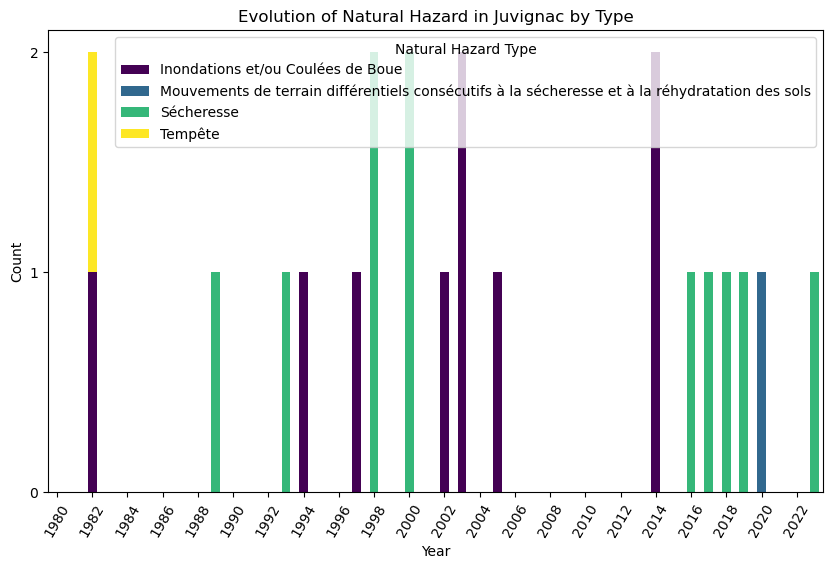

In [43]:
juvi_catnat = catnat_gaspar[catnat_gaspar.lib_commune == 'Juvignac']
# plot the evolution year by year and the type in a color
juvi_catnat['year'] = juvi_catnat['dat_deb'].dt.year
juvi_catnat['year'] = juvi_catnat['year'].astype(str)
juvi_catnat = juvi_catnat.sort_values(by='year')

plt.figure(figsize=(10, 6))

import seaborn as sns

# cumulated bar with different colors for each type
juvi_catnat_agg = juvi_catnat.groupby(['year', 'lib_risque_jo']).count().reset_index()
juvi_catnat_agg = juvi_catnat_agg[['year', 'lib_risque_jo', 'cod_commune']] 
for year in range(1980, 2024):
    if str(year) not in juvi_catnat_agg.year.unique():
        juvi_catnat_agg = pd.concat([juvi_catnat_agg, pd.DataFrame({'year': [str(year)], 'lib_risque_jo': [np.nan], 'cod_commune': [0]})])

juvi_catnat_agg = juvi_catnat_agg.sort_values(by='year')

juvi_catnat_agg_pivot = juvi_catnat_agg.pivot(index='year', columns='lib_risque_jo', values='cod_commune').fillna(0)
juvi_catnat_agg_pivot = juvi_catnat_agg_pivot.loc[:, juvi_catnat_agg_pivot.columns.notna()]
juvi_catnat_agg_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.xticks(rotation=60)
plt.gca().set_xticks(plt.gca().get_xticks()[::2])
# yticks just integers and remove None from the legend
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.legend(title='Natural Hazard Type')
plt.ylabel('Count')
plt.xlabel('Year')
plt.title('Evolution of Natural Hazard in Juvignac by Type')
plt.show()

C:\Users\colin\AppData\Local\Temp\ipykernel_22796\431015068.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  juvi_catnat['year'] = juvi_catnat['dat_deb'].dt.year
C:\Users\colin\AppData\Local\Temp\ipykernel_22796\431015068.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  juvi_catnat['year'] = juvi_catnat['year'].astype(str)


<Figure size 1000x600 with 0 Axes>

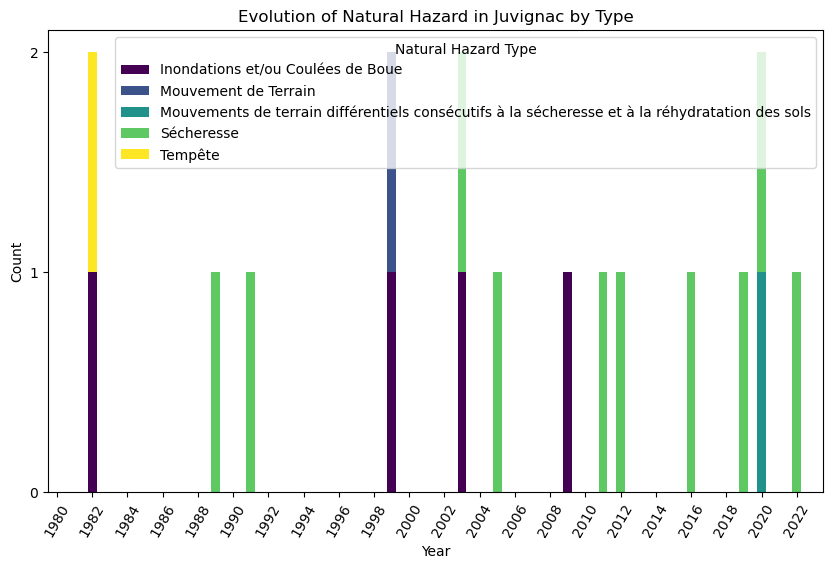

In [45]:
juvi_catnat = catnat_gaspar[catnat_gaspar.lib_commune == 'Rouffiac-Tolosan']
# plot the evolution year by year and the type in a color
juvi_catnat['year'] = juvi_catnat['dat_deb'].dt.year
juvi_catnat['year'] = juvi_catnat['year'].astype(str)
juvi_catnat = juvi_catnat.sort_values(by='year')

plt.figure(figsize=(10, 6))

import seaborn as sns

# cumulated bar with different colors for each type
juvi_catnat_agg = juvi_catnat.groupby(['year', 'lib_risque_jo']).count().reset_index()
juvi_catnat_agg = juvi_catnat_agg[['year', 'lib_risque_jo', 'cod_commune']] 
for year in range(1980, 2024):
    if str(year) not in juvi_catnat_agg.year.unique():
        juvi_catnat_agg = pd.concat([juvi_catnat_agg, pd.DataFrame({'year': [str(year)], 'lib_risque_jo': [np.nan], 'cod_commune': [0]})])

juvi_catnat_agg = juvi_catnat_agg.sort_values(by='year')

juvi_catnat_agg_pivot = juvi_catnat_agg.pivot(index='year', columns='lib_risque_jo', values='cod_commune').fillna(0)
juvi_catnat_agg_pivot = juvi_catnat_agg_pivot.loc[:, juvi_catnat_agg_pivot.columns.notna()]
juvi_catnat_agg_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.xticks(rotation=60)
plt.gca().set_xticks(plt.gca().get_xticks()[::2])
# yticks just integers and remove None from the legend
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.legend(title='Natural Hazard Type')
plt.ylabel('Count')
plt.xlabel('Year')
plt.title('Evolution of Natural Hazard in Juvignac by Type')
plt.show()

In [49]:
shp_bis = shp_bis.merge(df[['Code', 'artcom0923', 'art09hab23']], left_on='bv2022_code', right_on='Code', how='left')

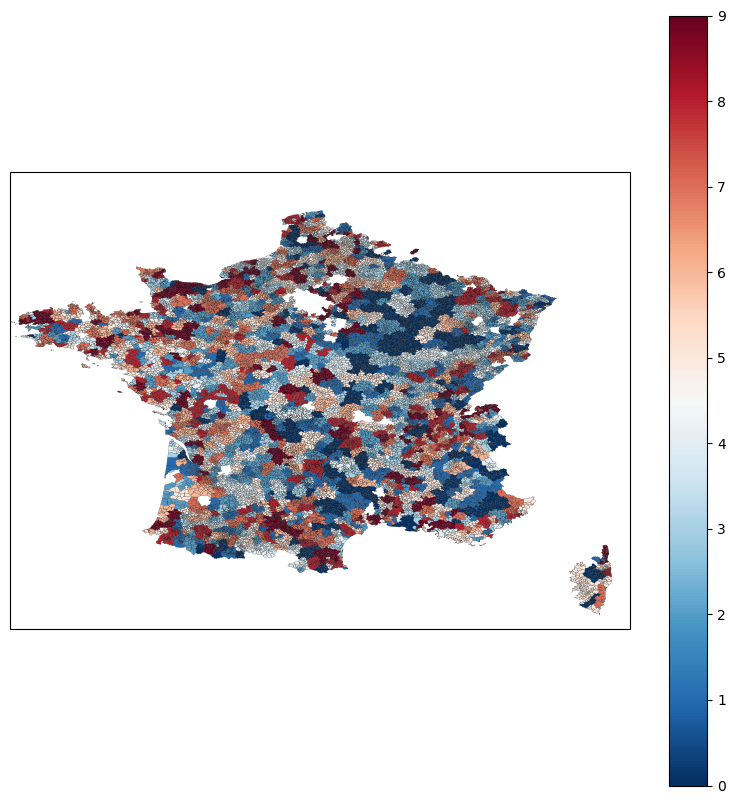

In [55]:
#plot artcom0923 by decile
shp_bis['artcom0923'] = shp_bis['artcom0923'].astype(float)
shp_bis['decile'] = pd.qcut(shp_bis['artcom0923'], 10, labels=False)

import cartopy.crs as ccrs

fig, ax = plt.subplots(1, 1, figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
shp_bis.plot(column='decile', legend=True, cmap='RdBu_r', linewidth=0.1, edgecolor='black', ax=ax)
ax.set_extent([-5, 10, 41, 52], crs=ccrs.PlateCarree())


C:\Users\colin\AppData\Local\Temp\ipykernel_22796\2546517403.py:1: DtypeWarning: Columns (0,4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/conso2009-2023-resultats-com.csv', sep=';')


C:\Users\colin\AppData\Local\Temp\ipykernel_22796\2364380686.py:1: DtypeWarning: Columns (0,4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/conso2009-2023-resultats-com.csv', sep=';')


Text(0.5, 0, 'Decile of artcom0923')

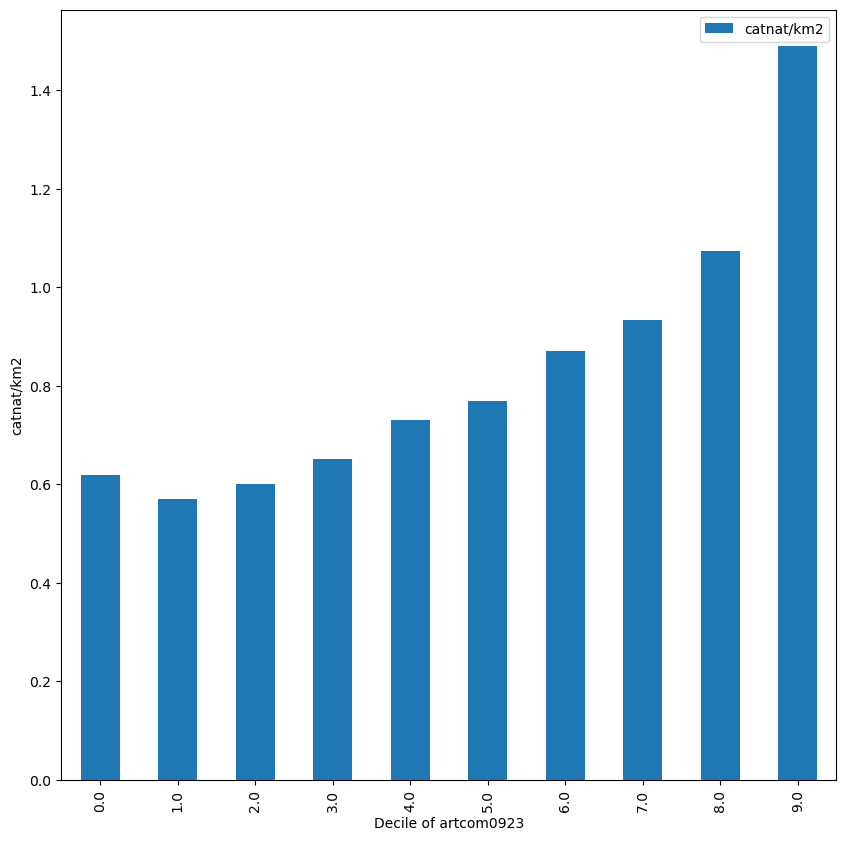

In [84]:
df = pd.read_csv('data/conso2009-2023-resultats-com.csv', sep=';')
df['idcom'] = df['idcom'].astype(str)
df['idcom'] = df['idcom'].apply(lambda x: '0'+x if len(x) == 4 else x)
catnat_gaspar['cod_commune'] = catnat_gaspar['cod_commune'].astype(str)
df['surfcom2023'] = df['surfcom2023']/1e6

catnat_gaspar_plot = catnat_gaspar.groupby('cod_commune').count().reset_index()[['cod_commune', 'lib_risque_jo']]
catnat_gaspar_plot = catnat_gaspar_plot.merge(df[['idcom', 'artcom0923', 'art09hab23', 'surfcom2023']], left_on='cod_commune', right_on='idcom', how='left')
# catnat_gaspar_plot 
catnat_gaspar_plot['decile'] = pd.qcut(catnat_gaspar_plot['artcom0923'], 10, labels=False)
catnat_gaspar_plot['catnat/km2'] = catnat_gaspar_plot['lib_risque_jo']/catnat_gaspar_plot['surfcom2023']

#plot the catnat/km2 by decile

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
catnat_gaspar_plot[['decile', 'catnat/km2']].groupby('decile').mean().plot(kind='bar', ax=ax)
plt.ylabel('catnat/km2')
plt.xlabel('Decile of artcom0923')



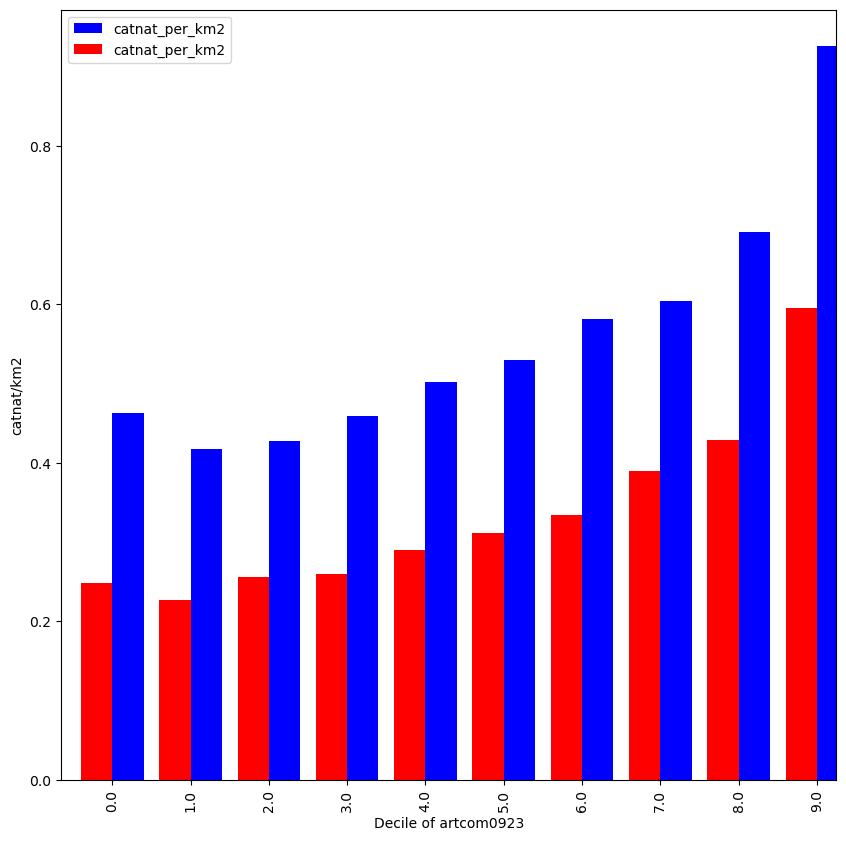

In [95]:

catnat_gaspar_plot = catnat_gaspar

catnat_gaspar_pre_2000 = catnat_gaspar_plot[catnat_gaspar_plot.dat_deb.dt.year < 2000]
catnat_gaspar_post_2000 = catnat_gaspar_plot[catnat_gaspar_plot.dat_deb.dt.year >= 2004]

catnat_gaspar_pre_2000 = catnat_gaspar_pre_2000.groupby('cod_commune').count().reset_index()[['cod_commune', 'lib_risque_jo']]
catnat_gaspar_pre_2000.columns = ['cod_commune', 'catnat_pre_2000']
catnat_gaspar_pre_2000 = catnat_gaspar_pre_2000.merge(df[['idcom', 'surfcom2023', 'artcom0923', 'art09hab23']], left_on='cod_commune', right_on='idcom', how='left')
# catnat_gaspar_pre_2000['surfcom2023'] = catnat_gaspar_pre_2000['surfcom2023']/1e6
catnat_gaspar_pre_2000['catnat_per_km2'] = catnat_gaspar_pre_2000['catnat_pre_2000'] / catnat_gaspar_pre_2000['surfcom2023']
catnat_gaspar_pre_2000['decile'] = pd.qcut(catnat_gaspar_pre_2000['artcom0923'], 10, labels=False)

catnat_gaspar_post_2000 = catnat_gaspar_post_2000.groupby('cod_commune').count().reset_index()[['cod_commune', 'lib_risque_jo']]
catnat_gaspar_post_2000.columns = ['cod_commune', 'catnat_post_2000']
catnat_gaspar_post_2000 = catnat_gaspar_post_2000.merge(df[['idcom', 'surfcom2023', 'artcom0923', 'art09hab23']], left_on='cod_commune', right_on='idcom', how='left')
# catnat_gaspar_post_2000['surfcom2023'] = catnat_gaspar_post_2000['surfcom2023']/1e6
catnat_gaspar_post_2000['catnat_per_km2'] = catnat_gaspar_post_2000['catnat_post_2000'] / catnat_gaspar_post_2000['surfcom2023']
catnat_gaspar_post_2000['decile'] = pd.qcut(catnat_gaspar_post_2000['artcom0923'], 10, labels=False)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

catnat_gaspar_pre_2000[['decile', 'catnat_per_km2']].groupby('decile').mean().plot(kind='bar', ax=ax, color='blue', position=0, width=0.4, label='Pre 2000')
catnat_gaspar_post_2000[['decile', 'catnat_per_km2']].groupby('decile').mean().plot(kind='bar', ax=ax, color='red', position=1, width=0.4, label='Post 2000')
plt.ylabel('catnat/km2')
plt.xlabel('Decile of artcom0923')
plt.legend()


In [92]:
catnat_gaspar_pre_2000[['decile', 'catnat_per_km2']].groupby('decile').mean()

catnat_per_km2
decile                
0.0           0.481235
1.0           0.434397
2.0           0.444468
3.0           0.478285
4.0           0.524602
5.0           0.553921
6.0           0.617194
7.0           0.644346
8.0           0.738500
9.0           0.991380

In [93]:
catnat_gaspar_post_2000[['decile', 'catnat_per_km2']].groupby('decile').mean()

catnat_per_km2
decile                
0.0           0.248067
1.0           0.227285
2.0           0.255467
3.0           0.259824
4.0           0.290084
5.0           0.311844
6.0           0.333878
7.0           0.389875
8.0           0.428261
9.0           0.595746

In [89]:
len(catnat_gaspar.year.unique())

43

In [77]:
catnat_gaspar_pre_2000

cod_commune  catnat_pre_2000  idcom  surfcom2023  catnat_per_km2
0           01001                1  01001    15.619934        0.064021
1           01002                1  01002     9.175479        0.108986
2           01004                4  01004    24.508833        0.163206
3           01005                2  01005    16.014205        0.124889
4           01006                1  01006     6.030856        0.165814
...           ...              ...    ...          ...             ...
34199       97420               14  97420    57.826707        0.242103
34200       97421               13  97421   103.822134        0.125214
34201       97422                5  97422   181.023692        0.027621
34202       97423                4  97423    42.477582        0.094167
34203       97424               13  97424    84.395624        0.154036

[34204 rows x 5 columns]

In [1]:
import xarray as xr
import rasterstats as rs
import rasterio as rio
import geopandas as gpd
import pandas as pd
import numpy as np
import rioxarray as rxr


path = 'C:/Users/colin/Downloads/fra_ppp_2018.tif'
da = rxr.open_rasterio(path, masked=True).squeeze()

ImportError: DLL load failed while importing _env: La procédure spécifiée est introuvable.

In [2]:
da = da.sortby('y')

In [3]:
da.sel(x=slice(0,1), y= slice(45, 46)).mean()*100

<xarray.DataArray ()>
array(35.39935946)
Coordinates:
    band         int32 1
    spatial_ref  int32 0

In [34]:
fra_ppp_2018 = xr.open_dataset('C:/Users/colin/Downloads/fra_ppp_2018_agg.nc')
fra_ppp_2006 = xr.open_dataset('C:/Users/colin/Downloads/fra_ppp_2006_agg.nc')

In [41]:
fra_ppp_2018 = fra_ppp_2018.rename({'var': 'population'})
fra_ppp_2006 = fra_ppp_2006.rename({'var': 'population'})

(array([ 24., 131.,  56.,  29.,  22.,  24.,  11.,   6.,  10.,   5.,   6.,
          5.,   0.,   0.,   6.,   0.,   1.,   1.,   1.,   1.,   0.,   1.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([-0.06399865, -0.00429464,  0.05540937,  0.11511338,  0.17481739,
         0.2345214 ,  0.29422541,  0.35392942,  0.41363343,  0.47333745,
         0.53304146,  0.59274547,  0.65244948,  0.71215349,  0.7718575 ,
         0.83156151,  0.89126552,  0.95096953,  1.01067355,  1.07037756,
         1.13008157,  1.18978558,  1.24948959,  1.3091936 ,  1.36889761,
         1.42860162,  1.48830564,  1.54800965,  1.60771366,  1.66741767,
         1.72712168,  1.78682569,  1.8465297 ,  1.90623371,  1.96593772,
         2.02564174,  2.08534575,  2.14504976,  2.20475377,  2.26445778,
         2.32416179,  2.3838658 ,  2.44356981,  2.50327382,  2.56297784,
 

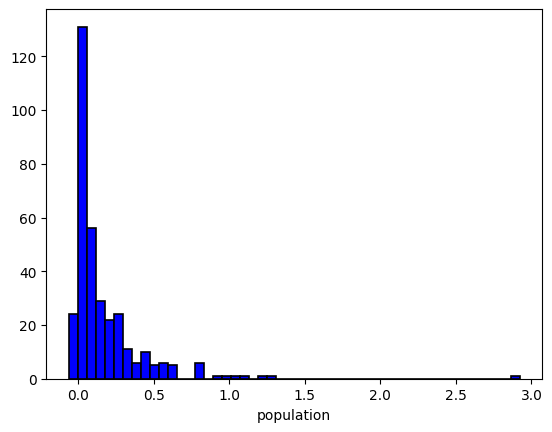

In [43]:
fra_ppp_changes = fra_ppp_2018.population - fra_ppp_2006.population

fra_ppp_changes.plot.hist(bins=50, color='blue', edgecolor='black', linewidth=1.2)

In [46]:
fra_ppp_changes

<xarray.DataArray 'population' (poly_idx: 342)>
array([ 2.39923028e-01,  1.03871441e-01,  3.75877318e-03,  2.24797193e-01,
       -3.97564089e-03,  4.42343658e-01,  1.99957298e-01,  1.33233280e-03,
        4.02388009e-03,  1.31755366e-01,  2.19860453e-01,  1.03816612e-01,
        1.08763375e-02,  1.52740789e-01,  3.23804197e-01,  6.50240386e-02,
        1.08632013e-01,  7.23599287e-02,  5.84641090e-01,  2.93446935e-01,
        9.18582027e-02,  5.13116969e-02, -1.96928935e-02,  1.27690165e-01,
        1.98061838e-01, -1.12253708e-02,  3.59656513e-02, -6.51068617e-03,
        1.80946925e-01,  9.63330061e-04,  5.21275951e-01,  5.30915223e-02,
        1.67718760e-01,  2.89910269e-01,  2.91837429e-01,  4.41759141e-01,
        2.41404537e-01,  1.23512397e-01,  2.11225649e-01,  1.96361903e-02,
        5.98675252e-01,  1.60949759e-02,  2.54442229e-02,  4.95860318e-01,
        5.63133200e-02,  1.90408919e-01,  3.40203600e-01,  8.48011124e-02,
        8.62034420e-03, -1.15689728e-02,  1.79327531e-01,  4.65514183e-02,
        2.56121504e-02,  5.76845628e-01,  9.37881433e-02,  9.45030179e-02,
        1.92349622e-02,  2.78676808e-02,  1.02982192e-01,  3.93194189e-02,
        9.56405666e-02,  1.95378027e-01,  3.41956648e-01,  1.65696365e-01,
        9.98547369e-01,  4.14598556e-02,  6.72417177e-02,  1.97047969e-01,
        2.16159405e-02,  2.87955823e-02,  5.44283784e-03,  2.92120190e+00,
        1.79146453e-02,  1.60007663e-01,  1.65091807e-02,  1.52428246e-01,
        9.05537689e-03,  8.68248233e-02,  3.23175529e-01,  5.71730236e-02,
...
        7.95461079e-03,  3.00587563e-01,  3.16622013e-01,  1.08106644e-01,
        1.02621276e-02,  2.33208360e-01,  1.18547475e-01,  3.91022542e-02,
        1.20553710e+00,  3.44812972e-01,  1.80042359e-02, -2.74259049e-02,
       -3.95545002e-03,  1.53407863e-02,  5.60319802e-02,  1.40590212e-02,
        1.62171120e-03,  5.87083393e-02,  2.99347580e-02,  1.11997960e-02,
        5.60606514e-02,  4.16512967e-01, -4.17810851e-03,  1.06530435e-01,
        4.62326860e-03, -4.79071370e-03,  4.98068990e-01,  2.86248437e-01,
        3.65424740e-01,  4.28283919e-01,  2.28047410e-02,  1.23510954e-02,
        6.46531197e-01,  1.01798215e-01, -1.08510918e-02, -1.06381659e-02,
        9.54280040e-02,  1.21954563e-01,  9.88373997e-02,  5.67525235e-01,
       -8.32855560e-04,  1.98012490e-01, -8.62839913e-05,  2.47616616e-01,
        6.11716801e-02,  2.27906044e-02,  2.59778237e-01,  1.21402668e-03,
       -3.36004870e-03,  2.17336732e-01,  2.19344364e-02,  1.22077968e-01,
        2.44471392e-01,  3.73739968e-01,  2.41173182e-01,  1.02102128e-01,
        7.02197902e-03,  7.09748649e-03,  7.24193679e-03,  1.34631948e-01,
        3.08922768e-01, -1.26398972e-02,  6.18516099e-02,  4.00693393e-02,
       -4.64863240e-03,  4.97547955e-02,  4.69916537e-02,  1.94602751e-02,
        1.59764273e-02,  2.41417002e-01,  2.42963004e-01,  1.33437696e-01,
        4.25721486e-02,  3.04615365e-02, -4.02086726e-03,  5.53514507e-02,
        4.83703262e-02,  6.43686646e-02])
Coordinates:
  * poly_idx  (poly_idx) int64 0 1 2 3 4 5 6 7 ... 335 336 337 338 339 340 341

In [47]:
lau

GISCO_ID CNTR_CODE  LAU_ID             LAU_NAME  POP_2023  \
0           DE_07143231        DE  071432  Hahn bei Marienberg     463.0   
1           DE_07143233        DE  071432                Halbs     353.0   
2           DE_07143235        DE  071432              Hattert    1753.0   
3             CZ_574694        CZ  574694               Žďárky     582.0   
4           DE_07143236        DE  071432             Heimborn     264.0   
...                 ...       ...     ...                  ...       ...   
98390         SK_515868        SK  515868      Balog nad Ipľom     769.0   
98391         SK_516210        SK  516210          Modrý Kameň    1670.0   
98392          ES_06130        ES   06130             Tamurejo     206.0   
98393  PL_1005101191505        PL  1.0051  Lipce Reymontowskie    3119.0   
98394  PL_1005261520408        PL  1.0052             Łopuszno    8772.0   

       POP_DENS_2    AREA_KM2  YEAR  \
0             NaN  229.517585  2023   
1             NaN  168.266742  2023   
2             NaN  153.128078  2023   
3             NaN  127.751820  2023   
4             NaN   72.338536  2023   
...           ...         ...   ...   
98390         NaN   92.132560  2023   
98391         NaN   85.011291  2023   
98392         NaN    6.932088  2023   
98393         NaN   72.753514  2023   
98394         NaN   49.561470  2023   

                                                geometry  
0      POLYGON ((7.94586 50.62726, 7.93628 50.62671, ...  
1      POLYGON ((7.97390 50.59696, 7.97181 50.58858, ...  
2      POLYGON ((7.78741 50.62740, 7.79022 50.62981, ...  
3      POLYGON ((16.21092 50.47371, 16.21457 50.47588...  
4      POLYGON ((7.74968 50.71947, 7.76872 50.71817, ...  
...                                                  ...  
98390  POLYGON ((19.14393 48.07057, 19.13819 48.07353...  
98391  POLYGON ((19.34790 48.25578, 19.36143 48.23624...  
98392  POLYGON ((-4.96356 38.93899, -4.96137 38.95208...  
98393  POLYGON ((19.87341 51.89485, 19.87159 51.90215...  
98394  POLYGON ((20.21740 51.00471, 20.22138 51.00554...  

[98395 rows x 9 columns]

<GeoAxes: >

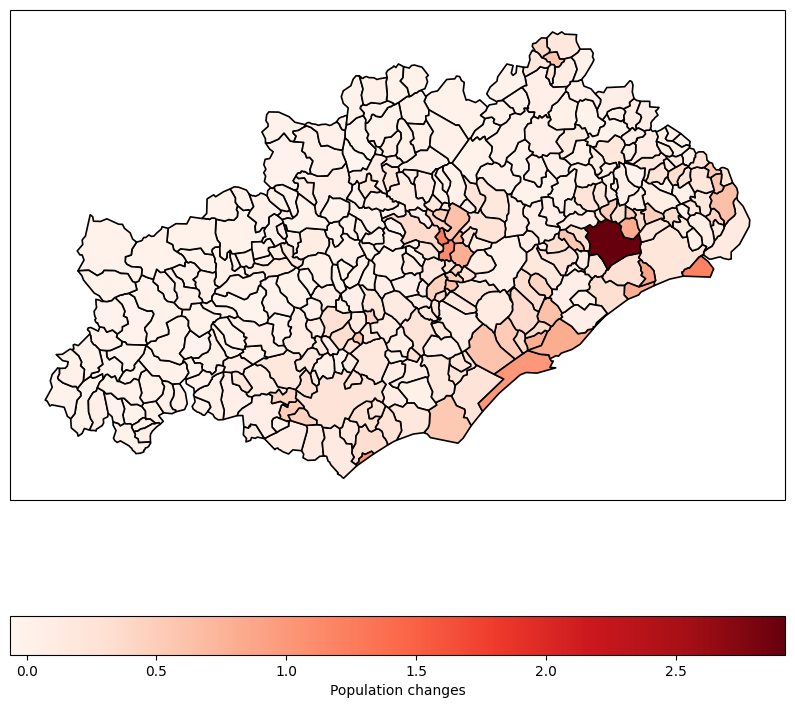

In [54]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

shp_fra = lau[lau.LAU_ID.str.startswith('34')]
shp_fra = shp_fra.to_crs('EPSG:4326')
shp_fra = shp_fra[shp_fra.CNTR_CODE == 'FR']
shp_fra['changes'] = fra_ppp_changes
fig,ax = plt.subplots(1,1, figsize=(10,10), subplot_kw={'projection': ccrs.PlateCarree()})

shp_fra.plot(column='changes', legend=True, cmap='Reds', ax=ax, linewidth=1.2, edgecolor='black', transform=ccrs.PlateCarree(), legend_kwds={'orientation': 'horizontal', 'label': 'Population changes'})

(array([160.,  57.,  46.,  28.,   5.,  12.,   5.,   6.,   2.,   4.,   5.,
          2.,   0.,   1.,   1.,   2.,   1.,   2.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.35311706e-02, 3.62295892e-01, 7.11060614e-01, 1.05982534e+00,
        1.40859006e+00, 1.75735478e+00, 2.10611950e+00, 2.45488422e+00,
        2.80364894e+00, 3.15241367e+00, 3.50117839e+00, 3.84994311e+00,
        4.19870783e+00, 4.54747255e+00, 4.89623727e+00, 5.24500200e+00,
        5.59376672e+00, 5.94253144e+00, 6.29129616e+00, 6.64006088e+00,
        6.98882560e+00, 7.33759033e+00, 7.68635505e+00, 8.03511977e+00,
        8.38388449e+00, 8.73264921e+00, 9.08141393e+00, 9.43017866e+00,
        9.77894338e+00, 1.01277081e+01, 1.04764728e+01, 1.08252375e+01,
        1.11740023e+01, 1.15227670e+01, 1.18715317e+01, 1.22202964e+01,
        1.

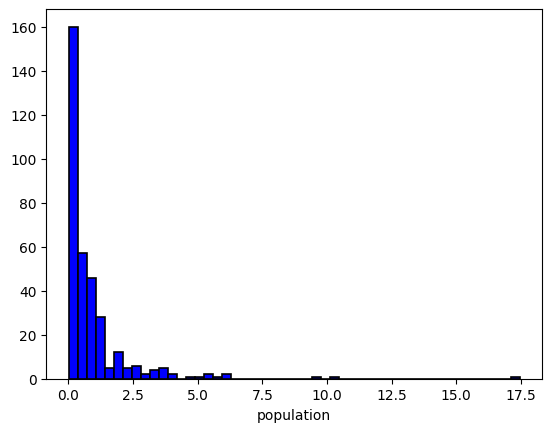

In [55]:
fra_ppp_2006.population.plot.hist(bins=50, color='blue', edgecolor='black', linewidth=1.2)

In [66]:
shp_fra = shp_fra.to_crs('EPSG:4326')
shp_fra['area'] = shp_fra.area*10000
shp_fra.sort_values(by='area', ascending=False)
shp_fra[shp_fra.LAU_NAME=='Montpellier']

C:\Users\colin\AppData\Local\Temp\ipykernel_63484\1352786235.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_fra['area'] = shp_fra.area*10000


GISCO_ID CNTR_CODE LAU_ID     LAU_NAME  POP_2023  POP_DENS_2  \
31336  FR_34172        FR  34172  Montpellier  295542.0         NaN   

          AREA_KM2  YEAR                                           geometry  \
31336  5178.849187  2023  POLYGON ((3.85704 43.65352, 3.87128 43.64819, ...   

        changes       area  
31336  2.921202  63.499123

In [69]:
shp_fra = lau[lau.LAU_ID.str.startswith('34')]
shp_fra = shp_fra.to_crs('EPSG:4326')
shp_fra = shp_fra[shp_fra.CNTR_CODE == 'FR']
shp_fra['area'] = shp_fra.area*10000
shp_fra['changes'] = fra_ppp_changes
shp_fra['pop_2018'] = fra_ppp_2018.population*100*shp_fra['area']
shp_fra['pop_2006'] = fra_ppp_2006.population*100*shp_fra['area']

C:\Users\colin\AppData\Local\Temp\ipykernel_63484\2966052145.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_fra['area'] = shp_fra.area*10000


In [70]:
shp_fra.sort_values(by='pop_2018', ascending=False)


GISCO_ID CNTR_CODE LAU_ID               LAU_NAME  POP_2023  POP_DENS_2  \
31336  FR_34172        FR  34172            Montpellier  295542.0         NaN   
30066  FR_34301        FR  34301                   Sète   43858.0         NaN   
96078  FR_34032        FR  34032                Béziers   78308.0         NaN   
29586  FR_34129        FR  34129                 Lattes   17453.0         NaN   
29608  FR_34154        FR  34154                Mauguio   16705.0         NaN   
...         ...       ...    ...                    ...       ...         ...   
51709  FR_34034        FR  34034                Boisset      39.0         NaN   
51847  FR_34326        FR  34326                Vélieux      91.0         NaN   
31357  FR_34195        FR  34195  Pégairolles-de-Buèges      55.0         NaN   
88076  FR_34303        FR  34303                  Sorbs      38.0         NaN   
31715  FR_34231        FR  34231            Romiguières      21.0         NaN   

          AREA_KM2  YEAR                                           geometry  \
31336  5178.849187  2023  POLYGON ((3.85704 43.65352, 3.87128 43.64819, ...   
30066  1048.166865  2023  POLYGON ((3.66176 43.42451, 3.67238 43.43002, ...   
96078   818.610810  2023  POLYGON ((3.27992 43.38842, 3.28191 43.38899, ...   
29586   539.822057  2023  POLYGON ((3.93913 43.59612, 3.93317 43.58788, ...   
29608   216.866019  2023  POLYGON ((4.03765 43.55633, 4.00572 43.55128, ...   
...            ...   ...                                                ...   
51709     2.245706  2023  POLYGON ((2.68389 43.42972, 2.68453 43.41916, ...   
51847     8.932453  2023  POLYGON ((2.75949 43.37942, 2.74867 43.38205, ...   
31357     4.158182  2023  POLYGON ((3.57229 43.82437, 3.58815 43.82683, ...   
88076     1.864017  2023  POLYGON ((3.39522 43.86162, 3.38998 43.87621, ...   
31715     5.934749  2023  POLYGON ((3.24392 43.80356, 3.23655 43.80540, ...   

             area   changes       pop_2018       pop_2006  
31336   63.499123  2.921202  129366.567013  110817.191187  
30066   49.006265  0.998547   52490.984804   47597.477071  
96078  106.885884  0.242963   38251.225181   35654.293632  
29586   36.221863  0.293447   21751.065489   20688.146034  
29608   85.415525  0.211226   20683.317663   18879.122679  
...           ...       ...            ...            ...  
51709   19.210697  0.001161      32.605650      30.375868  
51847   11.553769  0.003843      30.835626      26.395153  
31357   14.608974 -0.004460      28.855450      35.370847  
88076   22.562684 -0.000833      28.650806      30.529952  
31715    3.918917  0.034354      28.607138      15.144188  

[342 rows x 13 columns]

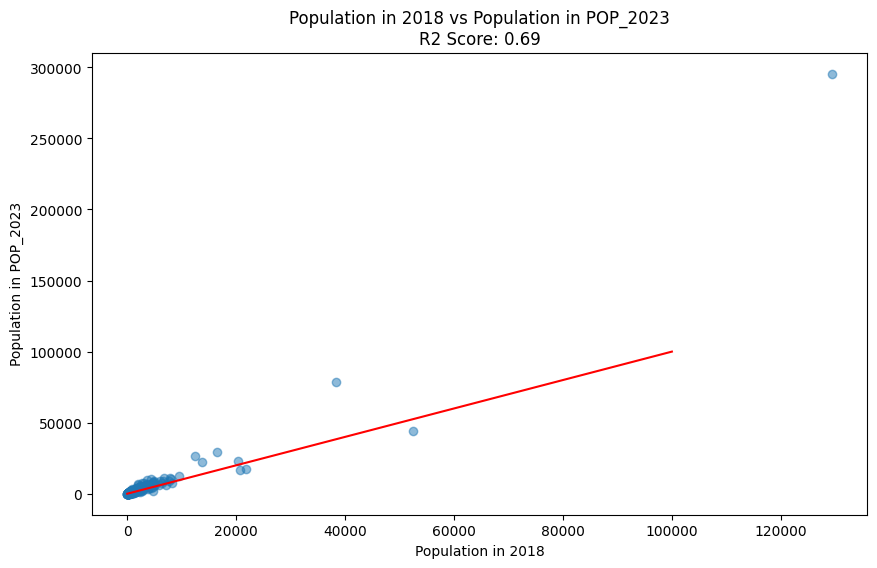

In [76]:
from sklearn.metrics import r2_score

#plot pop_2018 vs POP_2023

plt.figure(figsize=(10, 6))

plt.scatter(shp_fra['pop_2018'], shp_fra['POP_2023'], alpha=0.5)
plt.xlabel('Population in 2018')
plt.ylabel('Population in POP_2023')
#y=x line
plt.plot([0, 1e5], [0, 1e5], color='red')

r2 = r2_score(shp_fra['POP_2023'], shp_fra['pop_2018'])
plt.title(f'Population in 2018 vs Population in POP_2023\nR2 Score: {r2:.2f}')
plt.show()

In [ ]:
shp_fra = lau[lau.LAU_ID.str.startswith('34')]
shp_fra = shp_fra.to_crs('EPSG:4326')

In [46]:
import os
os.environ['ESMFMKFILE'] = "C:/Users/colin/anaconda3/envs/xarray_env/lib/esmf.mk"
import xagg as xa
import xarray as xr
import rasterio as rio
import geopandas as gpd
import pandas as pd
import numpy as np
import rioxarray as rxr


lau_path = 'C:/Users/colin/Downloads/LAU_2023_EU/*.shp'
import glob
lau_files = glob.glob(lau_path)
lau_files

lau = gpd.read_file(lau_files[0])
shp_fra = lau[lau.CNTR_CODE == 'FR']
shp_fra = shp_fra.to_crs('EPSG:4326')
shp_fra = shp_fra[shp_fra.LAU_ID.str.startswith('34')]

shp_fra['area'] = shp_fra.area*10000

fra_ppp_2018 = rxr.open_rasterio('C:/Users/colin/Downloads/fra_ppp_2018.tif', masked=True).squeeze()


# fra_ppp_2018 = fra_ppp_2018.rename({'y': 'lat', 'x': 'lon'})

# shp_fra = shp_fra[shp_fra.LAU_NAME=='Montpellier']


C:\Users\colin\AppData\Local\Temp\ipykernel_26920\2287101197.py:22: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_fra['area'] = shp_fra.area*10000


In [18]:
weight_map = xa.pixel_overlaps(fra_ppp_2018, shp_fra)
fra_ppp_2018 = fra_ppp_2018.rio.clip(shp_fra.geometry)


creating polygons for each pixel...
lat/lon bounds not found in dataset; they will be created.
calculating overlaps between pixels and output polygons...
success!


In [20]:
fra_ppp_2018.sum()

<xarray.DataArray ()>
array(283337.62, dtype=float32)
Coordinates:
    band         int32 1
    spatial_ref  int32 0

In [ ]:
fra_ppp_2018_agg = xa.aggregate(fra_ppp_2018, weight_map)

In [ ]:
fra_ppp_2018_agg

In [29]:
fra_2018 = pd.read_csv('C:/Users/colin/Downloads/fra_ppp_2018_region.csv')
fra_2018
fra_2006 = pd.read_csv('C:/Users/colin/Downloads/fra_ppp_2006_region.csv')

fra_2018['LAU_ID'] = fra_2018['LAU_ID'].astype(str)
fra_2006['LAU_ID'] = fra_2006['LAU_ID'].astype(str)

In [42]:
fra_2006 = fra_2006.rename(columns={'population': 'pop_2006'})
fra_2018 = fra_2018.rename(columns={'population': 'pop_2018'})

In [43]:
fra_2006

LAU_ID     pop_2006  GISCO_ID                        LAU_NAME  POP_2023  \
0    34267   4318.96300  FR_34267               Saint-Jean-de-Fos    1727.0   
1    34268   1003.77356  FR_34268      Saint-Jean-de-la-Blaquière     634.0   
2    34269    329.81512  FR_34269         Saint-Jean-de-Minervois     147.0   
3    34270  27235.92600  FR_34270             Saint-Jean-de-Védas   11086.0   
4    34271    710.34420  FR_34271                    Saint-Julien     219.0   
..     ...          ...       ...                             ...       ...   
337  34153   4932.15400  FR_34153                    Les Matelles    2005.0   
338  34189   3139.24560  FR_34189                         Olonzac    1687.0   
339  34220    747.61584  FR_34220                        Le Puech     251.0   
340  34248   1088.16260  FR_34248  Sainte-Croix-de-Quintillargues     943.0   
341  34134  10269.23200  FR_34134                        Lavérune    3328.0   

       AREA_KM2  
0    121.899662  
1     36.586952  
2      4.484749  
3    839.157169  
4     11.347509  
..          ...  
337  119.635459  
338   87.141356  
339   15.680456  
340  143.704032  
341  463.328160  

[342 rows x 6 columns]

In [47]:
shp_fra = shp_fra.merge(fra_2018[['pop_2018', 'LAU_ID']], left_on='LAU_ID', right_on='LAU_ID', how='left')
shp_fra = shp_fra.merge(fra_2006[['pop_2006', 'LAU_ID']], left_on='LAU_ID', right_on='LAU_ID', how='left')

In [48]:
shp_fra

GISCO_ID CNTR_CODE LAU_ID                        LAU_NAME  POP_2023  \
0    FR_34267        FR  34267               Saint-Jean-de-Fos    1727.0   
1    FR_34268        FR  34268      Saint-Jean-de-la-Blaquière     634.0   
2    FR_34269        FR  34269         Saint-Jean-de-Minervois     147.0   
3    FR_34270        FR  34270             Saint-Jean-de-Védas   11086.0   
4    FR_34271        FR  34271                    Saint-Julien     219.0   
..        ...       ...    ...                             ...       ...   
337  FR_34153        FR  34153                    Les Matelles    2005.0   
338  FR_34189        FR  34189                         Olonzac    1687.0   
339  FR_34220        FR  34220                        Le Puech     251.0   
340  FR_34248        FR  34248  Sainte-Croix-de-Quintillargues     943.0   
341  FR_34134        FR  34134                        Lavérune    3328.0   

     POP_DENS_2    AREA_KM2  YEAR  \
0           NaN  121.899662  2023   
1           NaN   36.586952  2023   
2           NaN    4.484749  2023   
3           NaN  839.157169  2023   
4           NaN   11.347509  2023   
..          ...         ...   ...   
337         NaN  119.635459  2023   
338         NaN   87.141356  2023   
339         NaN   15.680456  2023   
340         NaN  143.704032  2023   
341         NaN  463.328160  2023   

                                              geometry       area    pop_2018  \
0    POLYGON ((3.54643 43.66504, 3.55040 43.66909, ...  15.658665   5808.0360   
1    POLYGON ((3.40745 43.71153, 3.40538 43.71539, ...  19.145639   1639.3005   
2    POLYGON ((2.77795 43.39739, 2.75880 43.41353, ...  36.680436    369.0542   
3    POLYGON ((3.82402 43.55150, 3.81452 43.55895, ...  14.718372  28465.5040   
4    POLYGON ((2.84879 43.59756, 2.85778 43.60276, ...  21.700437    686.2416   
..                                                 ...        ...         ...   
337  POLYGON ((3.81571 43.74725, 3.82301 43.74430, ...  19.198338   5145.3228   
338  POLYGON ((2.77225 43.25779, 2.76306 43.25525, ...  21.669614   3109.8008   
339  POLYGON ((3.34173 43.69423, 3.34183 43.69121, ...  17.897717   1079.5718   
340  POLYGON ((3.90181 43.77954, 3.91081 43.77877, ...   6.962290   1256.5812   
341  POLYGON ((3.78515 43.57776, 3.79079 43.58767, ...   7.944037  10563.3770   

        pop_2006  
0     4318.96300  
1     1003.77356  
2      329.81512  
3    27235.92600  
4      710.34420  
..           ...  
337   4932.15400  
338   3139.24560  
339    747.61584  
340   1088.16260  
341  10269.23200  

[342 rows x 12 columns]

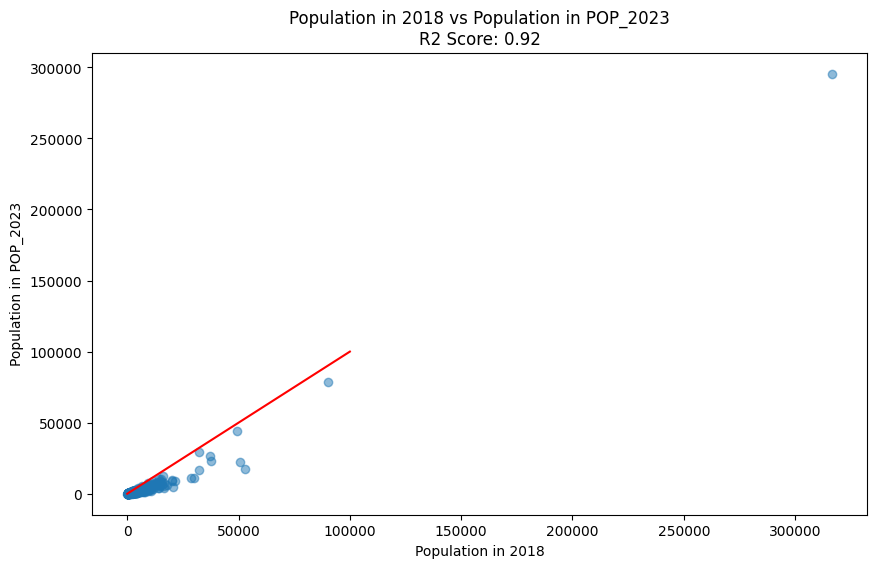

In [49]:
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

#plot pop_2018 vs POP_2023

plt.figure(figsize=(10, 6))

plt.scatter(shp_fra['pop_2018'], shp_fra['POP_2023'], alpha=0.5)
plt.xlabel('Population in 2018')
plt.ylabel('Population in POP_2023')
#y=x line
plt.plot([0, 1e5], [0, 1e5], color='red')

r2 = r2_score(shp_fra['POP_2023'], shp_fra['pop_2018'])
plt.title(f'Population in 2018 vs Population in POP_2023\nR2 Score: {r2:.2f}')
plt.show()

In [55]:
lau = lau[lau.CNTR_CODE == 'FR']

In [58]:
pop_2018 = rxr.open_rasterio('C:/Users/colin/Downloads/fra_ppp_2018.tif', masked=True).squeeze()

In [62]:
#max bounds lau
lau.bounds.max(), lau.bounds.min()

(minx    55.678774
 miny    51.060069
 maxx    55.835730
 maxy    51.089382
 dtype: float64,
 minx   -63.150815
 miny   -21.388811
 maxx   -62.969796
 maxy   -21.288194
 dtype: float64)

In [63]:
maxy = 52
miny = 37
maxx = 10
minx = -5

lau = lau.cx[minx:maxx, miny:maxy]

In [64]:
lau.bounds.max(), lau.bounds.min()

(minx     9.485806
 miny    51.060069
 maxx     9.559329
 maxy    51.089382
 dtype: float64,
 minx    -5.014265
 miny    41.334214
 maxx    -4.945366
 maxy    41.509132
 dtype: float64)

In [2]:
def process_county(da, county):
    """
    Process a single county:
      - Clip the raster (da) using the county's geometry.
      - Sum the raster values within that geometry.
      - Return a one-row DataFrame with LAU_ID and population.
    """
    # Wrap the geometry in a list since rio.clip expects an iterable of geometries.
    try:
        clipped = da.rio.clip([county.geometry], all_touched=True)
    except rxr.exceptions.NoDataInBounds:
        return pd.DataFrame({'population': [np.nan]}, index=[county.LAU_ID])
    # Compute the sum over the clipped area.
    pop_sum = clipped.sum().values

    return pd.DataFrame({'population': [pop_sum]}, index=[county.LAU_ID])

def agg_tif(tif_path, nuts3):
    """
    Aggregates population data from a raster TIFF file over county geometries.
    The computation over each county is parallelized using Dask.
    
    Parameters:
        tif_path (str): Path to the input TIFF file.
        nuts3 (GeoDataFrame): GeoDataFrame with county geometries and metadata.
        
    Returns:
        DataFrame: Aggregated results with county metadata.
    """
    # Open the raster and remove any singleton band dimensions.
    da = rxr.open_rasterio(tif_path, masked=True).squeeze()
    
    # Ensure nuts3 is in EPSG:4326 so it matches the raster's CRS.
    nuts3 = nuts3.to_crs(epsg=4326)
    
    # Optionally clip the raster to the union of all county geometries to reduce computation.
    da = da.rio.clip(nuts3.geometry, all_touched=True)
    
    # Create a delayed task for each county.
    tasks = [delayed(process_county)(da, county) for _, county in nuts3.iterrows()]
    
    # Execute all tasks in parallel.
    results = compute(*tasks)
    
    # Combine the individual DataFrames into a single DataFrame.
    df_final = pd.concat(results)
    df_final = df_final.reset_index().rename(columns={'index': 'LAU_ID'})
    
    # Merge with additional metadata from nuts3.
    df_final = df_final.merge(
        nuts3[['GISCO_ID', 'LAU_NAME', 'LAU_ID', 'POP_2023', 'AREA_KM2']],
        on='LAU_ID', how='left'
    )
    
    # Save the output as a CSV file.
    output_path = tif_path.replace(".tif", "_region.csv")
    df_final.to_csv(output_path, index=False, mode='w')
    
    return df_final


In [1]:
import rioxarray as rxr
import geopandas as gpd
import xarray as xr
import pandas as pd 

pop_2018 = rxr.open_rasterio('C:/Users/colin/Downloads/fra_ppp_2018.tif', masked=True).squeeze()
lau_2023 = gpd.read_file('../../data/LAU_2023_EU/LAU_RG_01M_2023_4326.shp')
lau_2023 = lau_2023[lau_2023.CNTR_CODE=='FR']

In [2]:
lau_test = lau_2023.sample(1)
lau_test

GISCO_ID CNTR_CODE LAU_ID  LAU_NAME  POP_2023  POP_DENS_2   AREA_KM2  \
48288  FR_70140        FR  70140  Châteney      67.0         NaN  25.407374   

       YEAR                                           geometry  
48288  2023  POLYGON ((6.33985 47.70094, 6.34072 47.69933, ...

In [11]:
pop_test.sum()

<xarray.DataArray ()>
array(291.3244, dtype=float32)
Coordinates:
    band         int32 1
    spatial_ref  int32 0

In [26]:
#load txt file
import pandas as pd

df = pd.read_csv('C:/Users/colin/Downloads/RP2006_INDCVIZC_txt/FD_INDCVIZC_2006.txt', sep=';', nrows=100000)

C:\Users\colin\AppData\Local\Temp\ipykernel_30312\3519171093.py:4: DtypeWarning: Columns (2,3,9,10,11,14,17,20,27,33,34,40,44,45,46,52,55,60,63,65,66,70,72,73,74,75) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/colin/Downloads/RP2006_INDCVIZC_txt/FD_INDCVIZC_2006.txt', sep=';', nrows=100000)


In [33]:
df_temp = df[~df[['CANTVILLE', 'TRANS']].isin(['Z']).any(axis=1)]
df_temp[['CANTVILLE', 'TRANS']].astype(float).groupby('CANTVILLE').mean()

TRANS
CANTVILLE          
1601.0     3.561404
1604.0     3.559603
1605.0     3.359606
1606.0     3.553290
1607.0     3.701850
1608.0     3.495726
1609.0     3.571235
1610.0     3.429257
1611.0     3.530973
1612.0     3.719557
1613.0     3.828080
1614.0     3.570957
1615.0     3.546809
1616.0     3.840909
1617.0     3.678519
1618.0     3.657143
1619.0     3.681048
1620.0     3.363636
1621.0     3.495556
1622.0     3.746429
1623.0     3.647297
1624.0     3.480211
1625.0     3.756637
1626.0     3.570158
1627.0     3.640769
1628.0     3.705036
1629.0     3.590457
1630.0     3.869704
1631.0     3.879672
1632.0     3.893805
1633.0     3.780088
1635.0     3.848223
1697.0     3.589770
1698.0     3.708299
1699.0     3.377193
1701.0     3.723208
1702.0     3.535181

In [20]:
df_geo = pd.read_excel(glob.glob('../../data/insee_geo.xlsx')[0], skiprows=5)


array(['0108', '0101', '0122', ..., '97699', '97613', '97611'],
      dtype=object)

In [28]:
df_geo

CODGEO                   LIBGEO  DEP  CTCD  REG       EPCI        EPT  \
0      01001  L'Abergement-Clémenciat   01   01D   84  200069193  ZZZZZZZZZ   
1      01002    L'Abergement-de-Varey   01   01D   84  240100883  ZZZZZZZZZ   
2      01004        Ambérieu-en-Bugey   01   01D   84  240100883  ZZZZZZZZZ   
3      01005      Ambérieux-en-Dombes   01   01D   84  200042497  ZZZZZZZZZ   
4      01006                  Ambléon   01   01D   84  200040350  ZZZZZZZZZ   
...      ...                      ...  ...   ...  ...        ...        ...   
34930  97613            M'Tsangamouji  976  976D    6  200059871  ZZZZZZZZZ   
34931  97614                 Ouangani  976  976D    6  200059871  ZZZZZZZZZ   
34932  97615                 Pamandzi  976  976D    6  200050532  ZZZZZZZZZ   
34933  97616                     Sada  976  976D    6  200059871  ZZZZZZZZZ   
34934  97617                 Tsingoni  976  976D    6  200059871  ZZZZZZZZZ   

        ARR  CANOV  ZE2020 UU2020 AAV2020 BV2022  
0       012   0108    8405  01000     524  01093  
1       011   0101    8405  01000     000  01004  
2       011   0101    8405  01303     243  01004  
3       012   0122    8434  01000     002  01333  
4       011   0104    8404  01000     286  01034  
...     ...    ...     ...    ...     ...    ...  
34930  ZZZZ  97613     601  9F204     9F1  97611  
34931  ZZZZ  97610     601  9F301     9F1  97611  
34932  ZZZZ  97611     601  9F401     9F1  97608  
34933  ZZZZ  97612     601  9F303     9F1  97611  
34934  ZZZZ  97613     601  9F304     9F1  97611  

[34935 rows x 13 columns]

In [ ]:
#for each CANOV in df_geo extract the name of the biggest city

(2044,)

In [ ]:
import glob
glob.glob('C:/Users/colin/Downloads/table-appartenance-geo-communes-2024/*')[0]

['C:/Users/colin/Downloads/table-appartenance-geo-communes-2024\\table-appartenance-geo-communes-2024.xlsx']

In [ ]:
pop_2018

<xarray.DataArray (y: 11707, x: 17646)>
[206581722 values with dtype=float32]
Coordinates:
    band         int32 1
  * x            (x) float64 -5.144 -5.143 -5.142 -5.142 ... 9.558 9.559 9.56
  * y            (y) float64 51.09 51.09 51.09 51.09 ... 41.34 41.34 41.34 41.33
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:       Area
    STATISTICS_MAXIMUM:  355.74725189867
    STATISTICS_MEAN:     0.72326357755031
    STATISTICS_MINIMUM:  0
    STATISTICS_STDDEV:   4.0528731758133
    scale_factor:        1.0
    add_offset:          0.0

In [66]:
from tqdm import tqdm
from dask import delayed, compute
import rioxarray as rxr
import pandas as pd
import numpy as np

def process_county(da, lau_id, nuts3):
    county = nuts3[nuts3.LAU_ID == lau_id]
    try:
        clipped = da.rio.clip([county.geometry.values[0]], all_touched=True)
    except rxr.exceptions.NoDataInBounds:
        return pd.DataFrame({'LAU_ID': [lau_id], 'population': [np.nan]})
    
    pop_sum = clipped.sum().values.item()  # .item() extracts scalar
    return pd.DataFrame({'LAU_ID': [lau_id], 'population': [pop_sum]})

def agg_tif(tif_path, nuts3):
    da = rxr.open_rasterio(tif_path, masked=True).squeeze()
    nuts3 = nuts3.to_crs(epsg=4326)
    da = da.rio.clip(nuts3.geometry, all_touched=True)

    lau_ids = nuts3['LAU_ID'].unique()

    # Create delayed tasks with tqdm progress bar
    tasks = [
        delayed(process_county)(da, lau_id, nuts3)
        for lau_id in tqdm(lau_ids, desc="Building tasks")
    ]

    # Compute tasks with progress bar
    results = list(tqdm(compute(*tasks), total=len(tasks), desc="Computing results"))

    # Concatenate all results into one DataFrame
    df_final = pd.concat(results)

    output_path = tif_path.replace(".tif", "_region.csv")
    df_final.to_csv(output_path, index=False)

    return df_final


<Axes: >

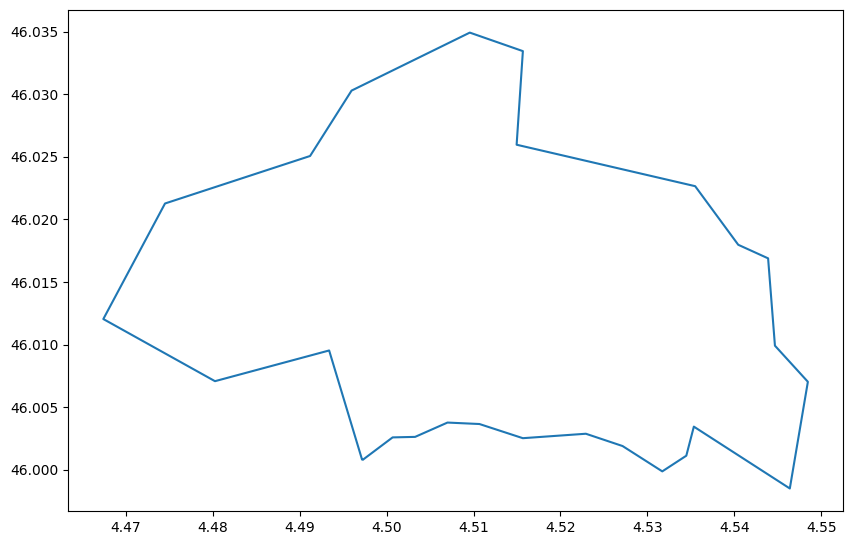

In [112]:
lau_temp = lau_2023.sample(1)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

lau_temp.boundary.plot(ax=ax)

83903    1.611265e-09
dtype: float64

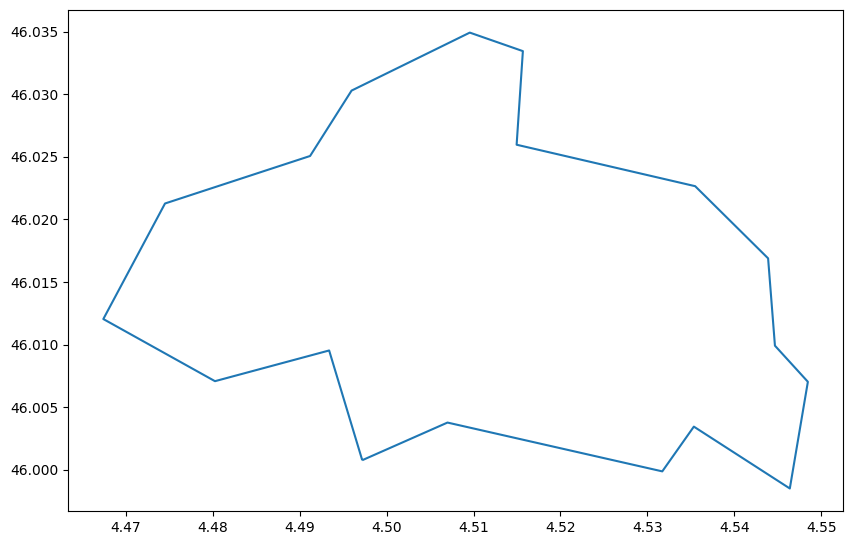

In [126]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
lau_temp = lau_temp.to_crs(epsg=4326)
lau_temp["geometry"].simplify(tolerance=0.002, preserve_topology=True).boundary.plot(ax=ax)

lau_temp.to_crs(epsg=4326).area / 1e6


In [131]:
lau_2023['area'] = lau_2023.area *1e4
lau_2023

GISCO_ID CNTR_CODE LAU_ID                    LAU_NAME  POP_2023  \
7356   FR_17315        FR  17315            Saint-Christophe    1362.0   
7357   FR_17316        FR  17316       Saint-Ciers-Champagne     397.0   
7358   FR_17317        FR  17317      Saint-Ciers-du-Taillon     559.0   
7360   FR_17318        FR  17318  Saint-Clément-des-Baleines     682.0   
7361   FR_17319        FR  17319              Sainte-Colombe     107.0   
...         ...       ...    ...                         ...       ...   
98310  FR_77446        FR  77446                      Savins     603.0   
98311  FR_62056        FR  62056                Audresselles     634.0   
98312  FR_62088        FR  62088     Bayenghem-lès-Seninghem     328.0   
98313  FR_49018        FR  49018              Baugé-en-Anjou   11829.0   
98331  FR_80173        FR  80173                 Cardonnette     538.0   

       POP_DENS_2    AREA_KM2  YEAR  \
7356          NaN   98.405778  2023   
7357          NaN   21.734226  2023   
7358          NaN   25.392222  2023   
7360          NaN   95.759454  2023   
7361          NaN   24.239725  2023   
...           ...         ...   ...   
98310         NaN   91.156683  2023   
98311         NaN  108.557041  2023   
98312         NaN  102.074824  2023   
98313         NaN   43.761359  2023   
98331         NaN   97.109175  2023   

                                                geometry        area  
7356   POLYGON ((-1.00913 46.13583, -0.95712 46.14357...   15.442743  
7357   POLYGON ((-0.31534 45.47257, -0.31115 45.46544...   20.721258  
7358   POLYGON ((-0.65606 45.40712, -0.65276 45.40782...   25.789704  
7360   POLYGON ((-1.51515 46.23076, -1.53147 46.22957...    8.124272  
7361   POLYGON ((-0.28619 45.27560, -0.28838 45.27879...    4.968331  
...                                                  ...         ...  
98310  POLYGON ((3.21999 48.50304, 3.20769 48.49314, ...    8.320903  
98311  POLYGON ((1.59394 50.81768, 1.58872 50.83150, ...    7.339756  
98312  POLYGON ((2.06420 50.69497, 2.06529 50.70995, ...    3.976127  
98313  POLYGON ((-0.19090 47.52783, -0.19049 47.53475...  323.291739  
98331  POLYGON ((2.33310 49.94450, 2.34529 49.96019, ...    6.990303  

[34956 rows x 10 columns]

In [134]:
from scipy.stats import pearsonr



pearsonr(lau_2023.AREA_KM2, lau_2023.area)

PearsonRResult(statistic=-0.012301811271698809, pvalue=0.021447322715075046)

GISCO_ID CNTR_CODE LAU_ID                    LAU_NAME  POP_2023  \
7356   FR_17315        FR  17315            Saint-Christophe    1362.0   
7357   FR_17316        FR  17316       Saint-Ciers-Champagne     397.0   
7358   FR_17317        FR  17317      Saint-Ciers-du-Taillon     559.0   
7360   FR_17318        FR  17318  Saint-Clément-des-Baleines     682.0   
7361   FR_17319        FR  17319              Sainte-Colombe     107.0   
...         ...       ...    ...                         ...       ...   
98310  FR_77446        FR  77446                      Savins     603.0   
98311  FR_62056        FR  62056                Audresselles     634.0   
98312  FR_62088        FR  62088     Bayenghem-lès-Seninghem     328.0   
98313  FR_49018        FR  49018              Baugé-en-Anjou   11829.0   
98331  FR_80173        FR  80173                 Cardonnette     538.0   

       POP_DENS_2    AREA_KM2  YEAR  \
7356          NaN   98.405778  2023   
7357          NaN   21.734226  2023   
7358          NaN   25.392222  2023   
7360          NaN   95.759454  2023   
7361          NaN   24.239725  2023   
...           ...         ...   ...   
98310         NaN   91.156683  2023   
98311         NaN  108.557041  2023   
98312         NaN  102.074824  2023   
98313         NaN   43.761359  2023   
98331         NaN   97.109175  2023   

                                                geometry      area  
7356   POLYGON ((-1.00913 46.13583, -0.95712 46.14357...  0.001544  
7357   POLYGON ((-0.31534 45.47257, -0.31115 45.46544...  0.002072  
7358   POLYGON ((-0.65606 45.40712, -0.65276 45.40782...  0.002579  
7360   POLYGON ((-1.51515 46.23076, -1.53147 46.22957...  0.000812  
7361   POLYGON ((-0.28619 45.27560, -0.28838 45.27879...  0.000497  
...                                                  ...       ...  
98310  POLYGON ((3.21999 48.50304, 3.20769 48.49314, ...  0.000832  
98311  POLYGON ((1.59394 50.81768, 1.58872 50.83150, ...  0.000734  
98312  POLYGON ((2.06420 50.69497, 2.06529 50.70995, ...  0.000398  
98313  POLYGON ((-0.19090 47.52783, -0.19049 47.53475...  0.032329  
98331  POLYGON ((2.33310 49.94450, 2.34529 49.96019, ...  0.000699  

[34956 rows x 10 columns]

In [119]:
gpd.GeoDataFrame(lau_temp)

GISCO_ID CNTR_CODE LAU_ID           LAU_NAME  POP_2023  POP_DENS_2  \
83903  FR_69037        FR  69037  Chambost-Allières     833.0         NaN   

        AREA_KM2  YEAR                                           geometry  
83903  59.795968  2023  POLYGON ((3894648.807 2558867.301, 3894423.426...

In [78]:
results = agg_tif('C:/Users/colin/Downloads/fra_ppp_2018.tif', lau_temp)

Computing results: 100%|██████████| 25/25 [00:00<00:00, 12301.45it/s]


In [71]:

results.merge(lau_temp, on='LAU_ID')

LAU_ID    population  GISCO_ID CNTR_CODE                LAU_NAME  POP_2023  \
0   28055    660.957275  FR_28055        FR      Le Boullay-Thierry     560.0   
1   37282   1513.299194  FR_37282        FR      Yzeures-sur-Creuse    1354.0   
2   72204    638.485352  FR_72204        FR               Montaillé     521.0   
3   63428    313.042206  FR_63428        FR                 Teilhet     283.0   
4   27258    510.359131  FR_27258        FR            Fort-Moville     522.0   
5   13097  11130.535156  FR_13097        FR    Saint-Martin-de-Crau   13413.0   
6   76175    253.539658  FR_76175        FR                   Clais     260.0   
7   80152    187.516113  FR_80152        FR          Bus-la-Mésière     148.0   
8   24349    437.128540  FR_24349        FR     Razac-de-Saussignac     339.0   
9   10210    517.494751  FR_10210        FR                 Luyères     455.0   
10  01212    802.995056  FR_01212        FR              Lescheroux     718.0   
11  65445    238.186646  FR_65445        FR                Tilhouse     227.0   
12  24477    228.174789  FR_24477        FR  Saint-Pardoux-de-Drône     193.0   
13  67343   5898.345215  FR_67343        FR          Oberhausbergen    5363.0   
14  26245     13.214590  FR_26245        FR                Pommerol       6.0   
15  59123   1916.876099  FR_59123        FR   Camphin-en-Carembault    1699.0   
16  77530    332.558136  FR_77530        FR                 Voulton     316.0   
17  22161   3175.177734  FR_22161        FR                    Pabu    2748.0   
18  02323    137.586823  FR_02323        FR         Fontaine-Uterte     134.0   
19  37019    530.400635  FR_37019        FR                  Barrou     455.0   
20  70380    183.781830  FR_70380        FR          Neurey-en-Vaux     176.0   
21  14726   6567.348145  FR_14726        FR             Valdallière    5755.0   
22  08380    222.967926  FR_08380        FR           Saint-Fergeux     216.0   
23  28397    471.179443  FR_28397        FR                  Umpeau     407.0   
24  04181     70.634239  FR_04181        FR           Saint-Jeannet      48.0   

    POP_DENS_2     AREA_KM2  YEAR  \
0          NaN    43.379432  2023   
1          NaN    24.409593  2023   
2          NaN    17.008010  2023   
3          NaN    14.985590  2023   
4          NaN    55.970231  2023   
5          NaN    62.390591  2023   
6          NaN    20.807802  2023   
7          NaN    21.141770  2023   
8          NaN    29.455760  2023   
9          NaN    25.846921  2023   
10         NaN    35.673773  2023   
11         NaN    34.541724  2023   
12         NaN    22.137959  2023   
13         NaN  1416.032321  2023   
14         NaN     0.593428  2023   
15         NaN   228.334186  2023   
16         NaN    12.027997  2023   
17         NaN   344.344386  2023   
18         NaN    23.016089  2023   
19         NaN    14.626213  2023   
20         NaN    33.247798  2023   
21         NaN    36.189469  2023   
22         NaN     8.436847  2023   
23         NaN    35.443075  2023   
24         NaN     1.650245  2023   

                                             geometry  
0   POLYGON ((1.43624 48.66391, 1.44676 48.65276, ...  
1   POLYGON ((0.91655 46.81583, 0.92515 46.80331, ...  
2   POLYGON ((0.68260 47.91820, 0.66672 47.93115, ...  
3   POLYGON ((2.84173 46.12347, 2.83794 46.11902, ...  
4   POLYGON ((0.41615 49.35116, 0.41923 49.35126, ...  
5   POLYGON ((4.87639 43.49452, 4.81667 43.54133, ...  
6   POLYGON ((1.46582 49.79256, 1.46553 49.79359, ...  
7   POLYGON ((2.69868 49.64958, 2.71719 49.65327, ...  
8   POLYGON ((0.32085 44.82409, 0.31273 44.81790, ...  
9   POLYGON ((4.17577 48.35776, 4.17316 48.35945, ...  
10  POLYGON ((5.11598 46.39588, 5.12443 46.40026, ...  
11  POLYGON ((0.29270 43.07386, 0.28154 43.08549, ...  
12  POLYGON ((0.42186 45.19704, 0.41635 45.20760, ...  
13  POLYGON ((7.66593 48.61217, 7.67742 48.62009, ...  
14  POLYGON ((5.44004 44.45279, 5.44235 44.45236, ...  
15  POLYGON ((2.99424 50.49666, 2.986

In [75]:
county = lau_2023.sample(1)
da = pop_2018
clipped = da.rio.clip([county.geometry.values[0]], all_touched=False)

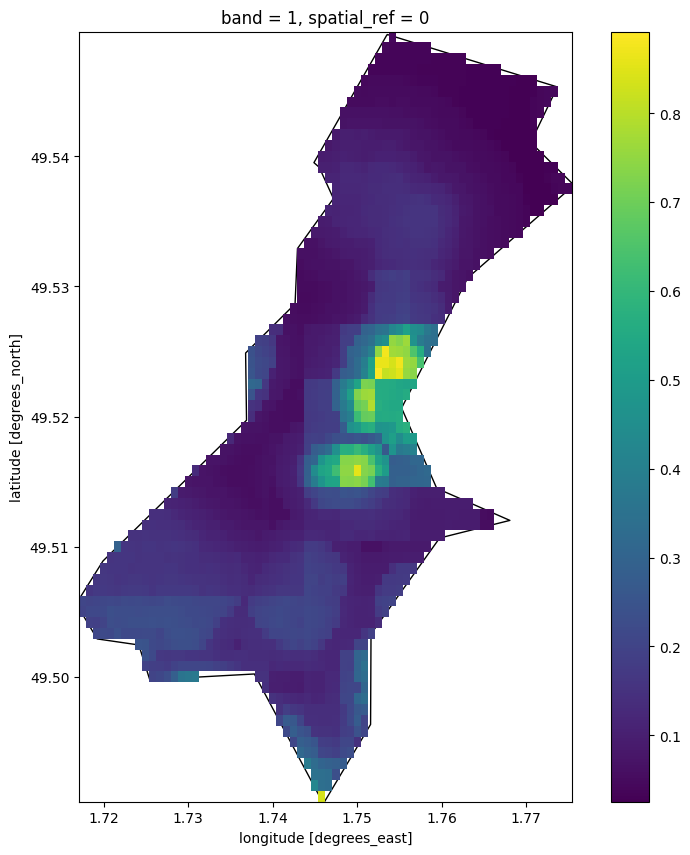

In [76]:
#plot county and clipped
import matplotlib.pyplot as plt
import geopandas as gpd

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
county.plot(ax=ax, color='none', edgecolor='black')
clipped.plot(ax=ax, cmap='viridis')

In [52]:
from dask import delayed, compute
import xagg as xa

def process_county(da, lau_id, nuts3):
    county = nuts3[nuts3.LAU_ID == lau_id]
    try:
        clipped = da.rio.clip([county.geometry.values[0]], all_touched=True)
    except rxr.exceptions.NoDataInBounds:
        return pd.DataFrame({'LAU_ID': [lau_id], 'population': [np.nan]})
    weight_map = xa.pixel_overlaps(clipped, county)
    sum_pop = xa.aggregate(clipped, weight_map).to_dataset()
    return pd.DataFrame({'LAU_ID': [lau_id], 'population': [sum_pop['var'].values.item()]})

def agg_tif(tif_path, nuts3):
    da = rxr.open_rasterio(tif_path, masked=True).squeeze()
    nuts3 = nuts3.to_crs(epsg=4326)
    da = da.rio.clip(nuts3.geometry, all_touched=True)

    lau_ids = nuts3['LAU_ID'].unique()
    tasks = [delayed(process_county)(da, lau_id, nuts3) for lau_id in lau_ids]

    results = compute(*tasks)
    return results

In [53]:
results = agg_tif('C:/Users/colin/Downloads/fra_ppp_2018.tif', lau_temp)

In [54]:
b = pd.concat(results).merge(lau_temp, on='LAU_ID')

In [63]:
b

LAU_ID  population  GISCO_ID CNTR_CODE                 LAU_NAME  POP_2023  \
0  10219    0.103701  FR_10219        FR    Maisons-lès-Soulaines      67.0   
1  77398    0.304759  FR_77398        FR             Sablonnières     717.0   
2  42035    0.125988  FR_42035        FR                    Cezay     210.0   
3  17060    0.357243  FR_17060        FR         Boutenac-Touvent     228.0   
4  27451    0.345943  FR_27451        FR                 Parville     292.0   
5  77035    0.185554  FR_77035        FR                  Blennes     548.0   
6  13113    2.629397  FR_13113        FR                 Venelles    8400.0   
7  34249    1.495948  FR_34249        FR            Saint-Drézéry    2735.0   
8  24366    0.200372  FR_24366        FR      Saint-André-d'Allas     856.0   
9  38431    2.468387  FR_38431        FR  Saint-Nazaire-les-Eymes    2960.0   

   POP_DENS_2    AREA_KM2  YEAR  \
0         NaN   11.019978  2023   
1         NaN   51.243558  2023   
2         NaN   20.134892  2023   
3         NaN   71.662695  2023   
4         NaN   64.379906  2023   
5         NaN   26.960920  2023   
6         NaN  408.831531  2023   
7         NaN  260.132701  2023   
8         NaN   29.004115  2023   
9         NaN  337.944934  2023   

                                            geometry  
0  POLYGON ((4.76319 48.29313, 4.76281 48.29647, ...  
1  POLYGON ((3.29731 48.84881, 3.28559 48.85311, ...  
2  POLYGON ((3.94388 45.81446, 3.97379 45.83140, ...  
3  POLYGON ((-0.74606 45.51173, -0.75114 45.50634...  
4  POLYGON ((1.07535 49.02947, 1.07392 49.03242, ...  
5  POLYGON ((2.98897 48.20901, 2.98251 48.21309, ...  
6  POLYGON ((5.53495 43.58139, 5.52998 43.58048, ...  
7  POLYGON ((3.94908 43.71739, 3.95437 43.72374, ...  
8  POLYGON ((1.10239 44.89588, 1.10633 44.91652, ...  
9  POLYGON ((5.81874 45.28401, 5.82668 45.29491, ...

In [61]:
(b['population'] * b['AREA_KM2']*100).values - a['population'] 

0       -0.518419
0      784.434249
0       22.053669
0     2359.953267
0     1907.130766
0     -205.145834
0    98749.053802
0    36300.865179
0     -414.472987
0    79539.046827
Name: population, dtype: float64

In [62]:
(b['population'] * b['AREA_KM2']*100)

0       114.277922
1      1561.693770
2       253.676167
3      2560.096455
4      2227.178282
5       500.269815
6    107498.024506
7     38914.511663
8       581.161290
9     83417.890333
dtype: float64